Standard Bank Technical Skills Assessment Bank marketing data set

Author: Thamusanqa (Thamu) Mnyulwa

Date: 19 Nov. 2022

Task

> <span style="color:blue">Run a classification model to predict who will take up a savings product</span>


Interpretation, create a classification model and explore how one would use this to create a model that is usable through deployment.

**Approach**

So the initial work was done in this notebook and then it was split into different notebooks in order to breakdown the work for evaluation.

a model in the research environment, and then transform the Jupyter notebooks into production code, package the code and deploy to an API, and add continuous integration and continuous delivery.

To maximize reproducibility during deployment, through versioning, code repositories and the use of docker. 


# Data

The dataset is presented [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) using descriptions from the UCL machine learning repository, with categorical covariates in green, numeric covariates in blue, and the response in red.

## Input variables:  

### bank client data:  

 1.  <span style="color:blue"> age </span> (numeric)   
 2.  <span style="color:green"> job  </span> : type of job (categorical)
	 -  'admin.',
	 - 'blue-collar'
	 - 'entrepreneur'
	 - 'housemaid'
	 - 'management'
	 - 'retired'
	 - 'self-employed'
	 - 'services'
	 - 'student'
	 - 'technician'
	 - 'unemployed'
	 - 'unknown'   
 3.   <span style="color:green">marital</span> : marital status (categorical ; note: 'divorced' means
    divorced or widowed) 
	  - 'divorced'
	  - 'married'
	  - 'single'
	  - 'unknown' 
 4.  <span style="color:green">education</span> (categorical)
     - 'basic.4y',
     - 'basic.6y'
     - 'basic.9y'
     - 'high.school'
     - 'illiterate'
     - 'professional.course'
     - 'university.degree'
     - 'unknown'
 5.   <span style="color:green">default</span>: has credit in default? (categorical)
      - 'no'
      - 'yes'
      - 'unknown'
 6. <span style="color:green">housing</span>: has housing loan? (categorical)
    - 'no'
    - 'yes'
    - 'unknown'  
 10. <span style="color:green">loan</span>: has personal loan? (categorical)
     - 'no'
     - 'yes'
     - 'unknown'

### related with the last contact of the current campaign:  

 8. <span style="color:green">contact</span>: contact communication type (categorical) 
	 - 'cellular'
	 - 'telephone'  
 9. <span style="color:green">month</span>: last contact month of year, all 12 (categorical)
     -  'jan'
     -   ...
     -  'dec'
     
 10. <span style="color:green">day_of_week</span>: last contact day of the week (categorical)
	 -  'mon'
	 - 'tue'
	 - 'wed'
	 - 'thu'
	 - 'fri'  
 11. <span style="color:blue">duration</span>: last contact duration, in seconds (numeric). 
     - Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. 
     - Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   
### other attributes:  

 12. <span style="color:blue">campaign</span>: (numeric)
     - number of contacts performed during this campaign and for this client (numeric, includes last contact)  
 13. <span style="color:blue">pdays</span>: (numeric)
     - number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
 14. <span style="color:blue">previous</span>: (numeric) 
     - number of contacts performed before this campaign and for this client (numeric)  
 15. <span style="color:green">poutcome</span>: (categorical) : outcome of the previous marketing campaig
     -  'failure'
     - 'nonexistent'
     - 'success'
  
### social and economic context attributes
 
 16. <span style="color:blue">emp.var.rate</span>: (numeric)
     - employment variation rate - quarterly indicator   
 17. <span style="color:blue">cons.price.idx</span>: (numeric)
     - consumer price index - monthly indicator
 18. <span style="color:blue">cons.conf.idx</span>: (numeric)
     - consumer confidence index - monthly indicator   
 19. <span style="color:blue">euribor3m</span>: (numeric)
     - euribor 3 month rate - daily indicator   
 20. <span style="color:blue">nr.employed</span>: (numeric)
     - number of employees - quarterly indicator  
  
## Output variable (desired target):  
21.  <span style="color:red">y</span> - has the client subscribed a term deposit? (binary): 
      - 'yes'
      - 'no'
      
      
As previously mentioned, we where tasked to "run a classification model to predict who will take up a savings product", our emphasis is focusing on the inference of the model rather than focusing on the predicting ability.

# Preamble and import

In [ ]:
#!pip3 install loguru
#!pip3 install pipeline

In [1]:
# Preamble
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sklearn.model_selection as model_selection
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Import raw dataset from URL (same as data provided, just put in a git repository for ease of)
url = 'https://raw.githubusercontent.com/ThamuMnyulwa/bankMarketing/main/bank-additional-full.csv' # DATA_URL

column_names = ["age","job","marital","education","default",
                "housing","loan","contact","month","day_of_week","duration",
                "campaign","pdays","previous","poutcome","emp.var.rate",
                "cons.price.idx","cons.conf.idx","euribor3m","nr.employed",
                "y"] # DF_COLUMNS



cat_columns = ["job","marital","education","default",
                "housing","loan","contact","month","day_of_week","poutcome"]

#['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']


numeric_columns =  ["age","duration", "campaign","pdays","previous","emp.var.rate",
                "cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]

response = ["y"]


raw_dataset = pd.read_csv(url, na_values='?',sep=';'
                          , skipinitialspace=True, index_col=None)

In [2]:
# Copy raw data into data variable for analysis
data = raw_dataset.copy()

# Show rows columns and head
print("rows:   ",data.shape[0])
print("columns:",data.shape[1])



data.head(3)

rows:    41188
columns: 21


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  

[3 rows x 21 columns]

In [3]:
# Check the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Data analysis
Now that we have our dataset in order we need to split it in order to use the training set in order to make predictions on the test set. This dataset is relatively small ($<<10^6$), so we have chosen to just do a train-test split rather than the train-validation-test split that would have been the reasonable approach in the case of a larger dataset.

The idea would be to build your model on the training set, tune the hyper-parameters on the validation set then test it on the test set. 

We then go about doing the exploration on the training set then test the models performance on the test set.

In [4]:
# Test-train split

#DATA_URL
#DF_COLUMNS
RANDOM_SEED = 100

import pandas as pd
from loguru import logger
from sklearn.model_selection import train_test_split


# Copy raw data into data variable for analysis
#data = raw_dataset.copy()
#data = data.replace({"Origin": {1: 'US', 2: 'Asia', 3: 'EU'}})


# Split the data - train, validation and test
train_set, test_set = train_test_split(data,test_size=0.30, random_state=RANDOM_SEED) # RANDOM_SEED = 100

train = train_set
test = test_set

print("original rows:    ",data.shape[0])
print("original columns: ",data.shape[1],"\n\n")

print("train prop:      ",(train.shape[0]/data.shape[0]))
print("train rows:      ",train.shape[0])
print("train columns:   ",train.shape[1],"\n\n")

print("train prop:   ",(test.shape[0]/data.shape[0]))
print("test rows:    ",test.shape[0])
print("test columns: ",data.shape[1])

original rows:     41188
original columns:  21 


train prop:       0.6999854326502865
train rows:       28831
train columns:    21 


train prop:    0.3000145673497135
test rows:     12357
test columns:  21


## Missingness analysis

Even though the missingness is not significant here, the appropriate approach would  to perform an analysis of the missingness mechanisms (the missing values relationship with one another). 

We switch to R and perform some missingness mechanism analysis, reason being, if the data is missing completely at random (MCAR) and not missing not at random (MNAR) or missing at random (MAR) before we perform the appropriate technique.

The finest tools for the task are not limited to a single language, and R provides a more rich environment for missing data analysis, as a result we use it here for the missing data analysis. ([source:running r in python](https://anderfernandez.com/en/blog/how-to-program-with-python-and-r-in-the-same-jupyter-notebook/)). PypeR provides another simple way to access R from Python through pipes.

In [5]:
train_set.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

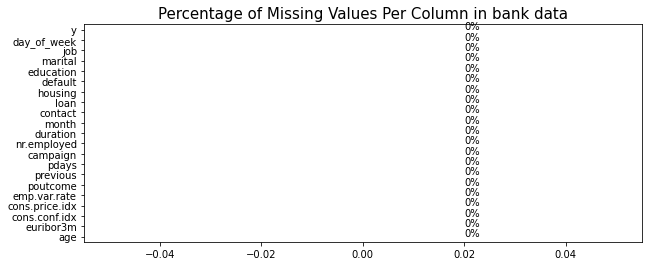

In [6]:
# visually check if there any missing values in train set
ax = data.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 4))
plt.title('Percentage of Missing Values Per Column in bank data', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [126]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Alternate view on missingness

In truth there could be some missingness, mostly captured as unknown that the original authours have already dealt with for us by transforming `unknown` into a class. Take note of how merely substituting `unknown` for a missing value in the import statement results in a completely different missingness profile. 

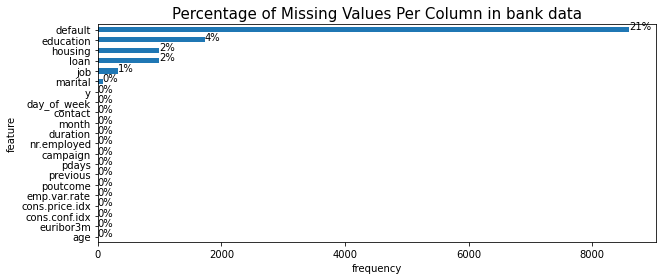

In [102]:
# set 'unknown' to missing
raw_dataset0 = raw_dataset.replace('unknown', np.nan)

# Split the data - train, validation and test
raw_dataset0_train, raw_dataset0_test = train_test_split(raw_dataset0,test_size=0.30, random_state=RANDOM_SEED) 

# visually check if there any missing values in train set
ax = raw_dataset0.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 4))
plt.title('Percentage of Missing Values Per Column in bank data', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
    
plt.xlabel("frequency")
plt.ylabel("feature")
plt.show()

Let's go ahead and find out which variables of the dataset contain missing values.

In [101]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in raw_dataset0.columns if raw_dataset0[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

raw_dataset0[vars_with_na].isnull().mean().sort_values(ascending=False)

default      0.208726
education    0.042027
loan         0.024036
housing      0.024036
job          0.008012
marital      0.001942
dtype: float64

From this point we can cross check how they went about dealing with the missingness. We can also visualize the percentage of missing values in the variables as follows:

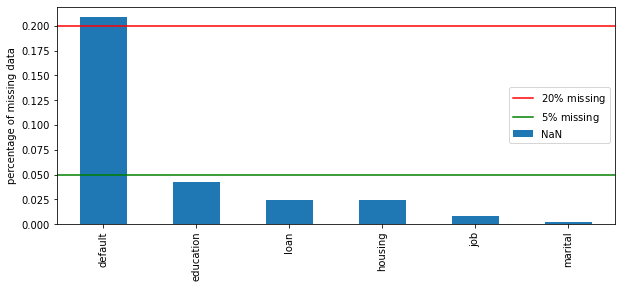

In [117]:
# plot

raw_dataset0[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4), label="NaN")
plt.ylabel('percentage of missing data')
plt.axhline(y=0.20, color='r', linestyle='-', label=r"$20\%$ missing")
plt.axhline(y=0.05, color='g', linestyle='-', label=r"$5\%$ missing")

plt.legend(loc=0)
plt.show()

In [118]:
cat_na = [var for var in cat_columns if var in vars_with_na]
num_na = [var for var in numeric_columns if var in vars_with_na]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  6
Number of numerical variables with na:  0


In [121]:
# show categorical columns with NaN
cat_na

['job', 'marital', 'education', 'default', 'housing', 'loan']

**Relationship between missing data and response (product-taker)**

Let's evaluate the price of the house in those observations where the information is missing. We will do this for each variable that shows missing data.

In [126]:
def analyse_na_value(df, var):

    # copy of the dataframe, so that we do not override the original data
    # see the link for more details about pandas.copy()
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
    df = df.copy()

    # let's make an interim variable that indicates 1 if the
    # observation was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the median SalePrice in the observations where data is missing
    # vs the observations where data is available

    # determine the median price in the groups 1 and 0,
    # and the standard deviation of the sale price,
    # and we capture the results in a temporary dataset
    tmp = df.groupby(var)['y'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

## Unique values

In [127]:
# Count number of unique values in whole dataset
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [143]:
# Count number of unique values in train set
train.nunique()

age                 76
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1435
campaign            42
pdays               25
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          312
nr.employed         11
y                    2
dtype: int64

In [133]:
# proportion of unique values in trainset
train.nunique()/len(train)

age               0.002636
job               0.000416
marital           0.000139
education         0.000277
default           0.000104
housing           0.000104
loan              0.000104
contact           0.000069
month             0.000347
day_of_week       0.000173
duration          0.049773
campaign          0.001457
pdays             0.000867
previous          0.000277
poutcome          0.000104
emp.var.rate      0.000347
cons.price.idx    0.000902
cons.conf.idx     0.000902
euribor3m         0.010822
nr.employed       0.000382
y                 0.000069
dtype: float64

In [134]:
# print the unique values in seamingly discrete columns  (categorical values)
col_check = ["job","marital","education","default",
                "housing","loan","contact","month","day_of_week","poutcome"]


# count number of unique values in categorical columns
train[col_check].nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
dtype: int64

In [145]:
# Difference between unique values in train set and actual data 
# (this is wrong statistically speaking but the reason
# but the reason I do this is in case I have errors in my pipeline.
# this is a safety measure for errors that may come up)
# I have done this as a way to confirm my hypothesis

train[col_check].nunique() - data[col_check].nunique()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

In [138]:
# Proportion of uniquness in train set
train[col_check].nunique() /len(train)

job            0.000416
marital        0.000139
education      0.000277
default        0.000104
housing        0.000104
loan           0.000104
contact        0.000069
month          0.000347
day_of_week    0.000173
poutcome       0.000104
dtype: float64

In [142]:
for col in col_check:
    print("\n", col,"\t",train[col].unique(),"\n")


 job 	 ['admin.' 'technician' 'retired' 'self-employed' 'management' 'services'
 'unemployed' 'entrepreneur' 'student' 'unknown' 'blue-collar' 'housemaid'] 


 marital 	 ['married' 'single' 'divorced' 'unknown'] 


 education 	 ['university.degree' 'basic.9y' 'high.school' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate'] 


 default 	 ['no' 'unknown' 'yes'] 


 housing 	 ['yes' 'no' 'unknown'] 


 loan 	 ['no' 'yes' 'unknown'] 


 contact 	 ['telephone' 'cellular'] 


 month 	 ['may' 'nov' 'jul' 'oct' 'jun' 'aug' 'mar' 'apr' 'dec' 'sep'] 


 day_of_week 	 ['thu' 'fri' 'mon' 'tue' 'wed'] 


 poutcome 	 ['nonexistent' 'failure' 'success'] 



In [ ]:
# Scatter plot of the entire set
g = sns.PairGrid(data.loc[:, data.columns != "y"])
g = g.map_diag(plt.hist, alpha=0.4)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.regplot)

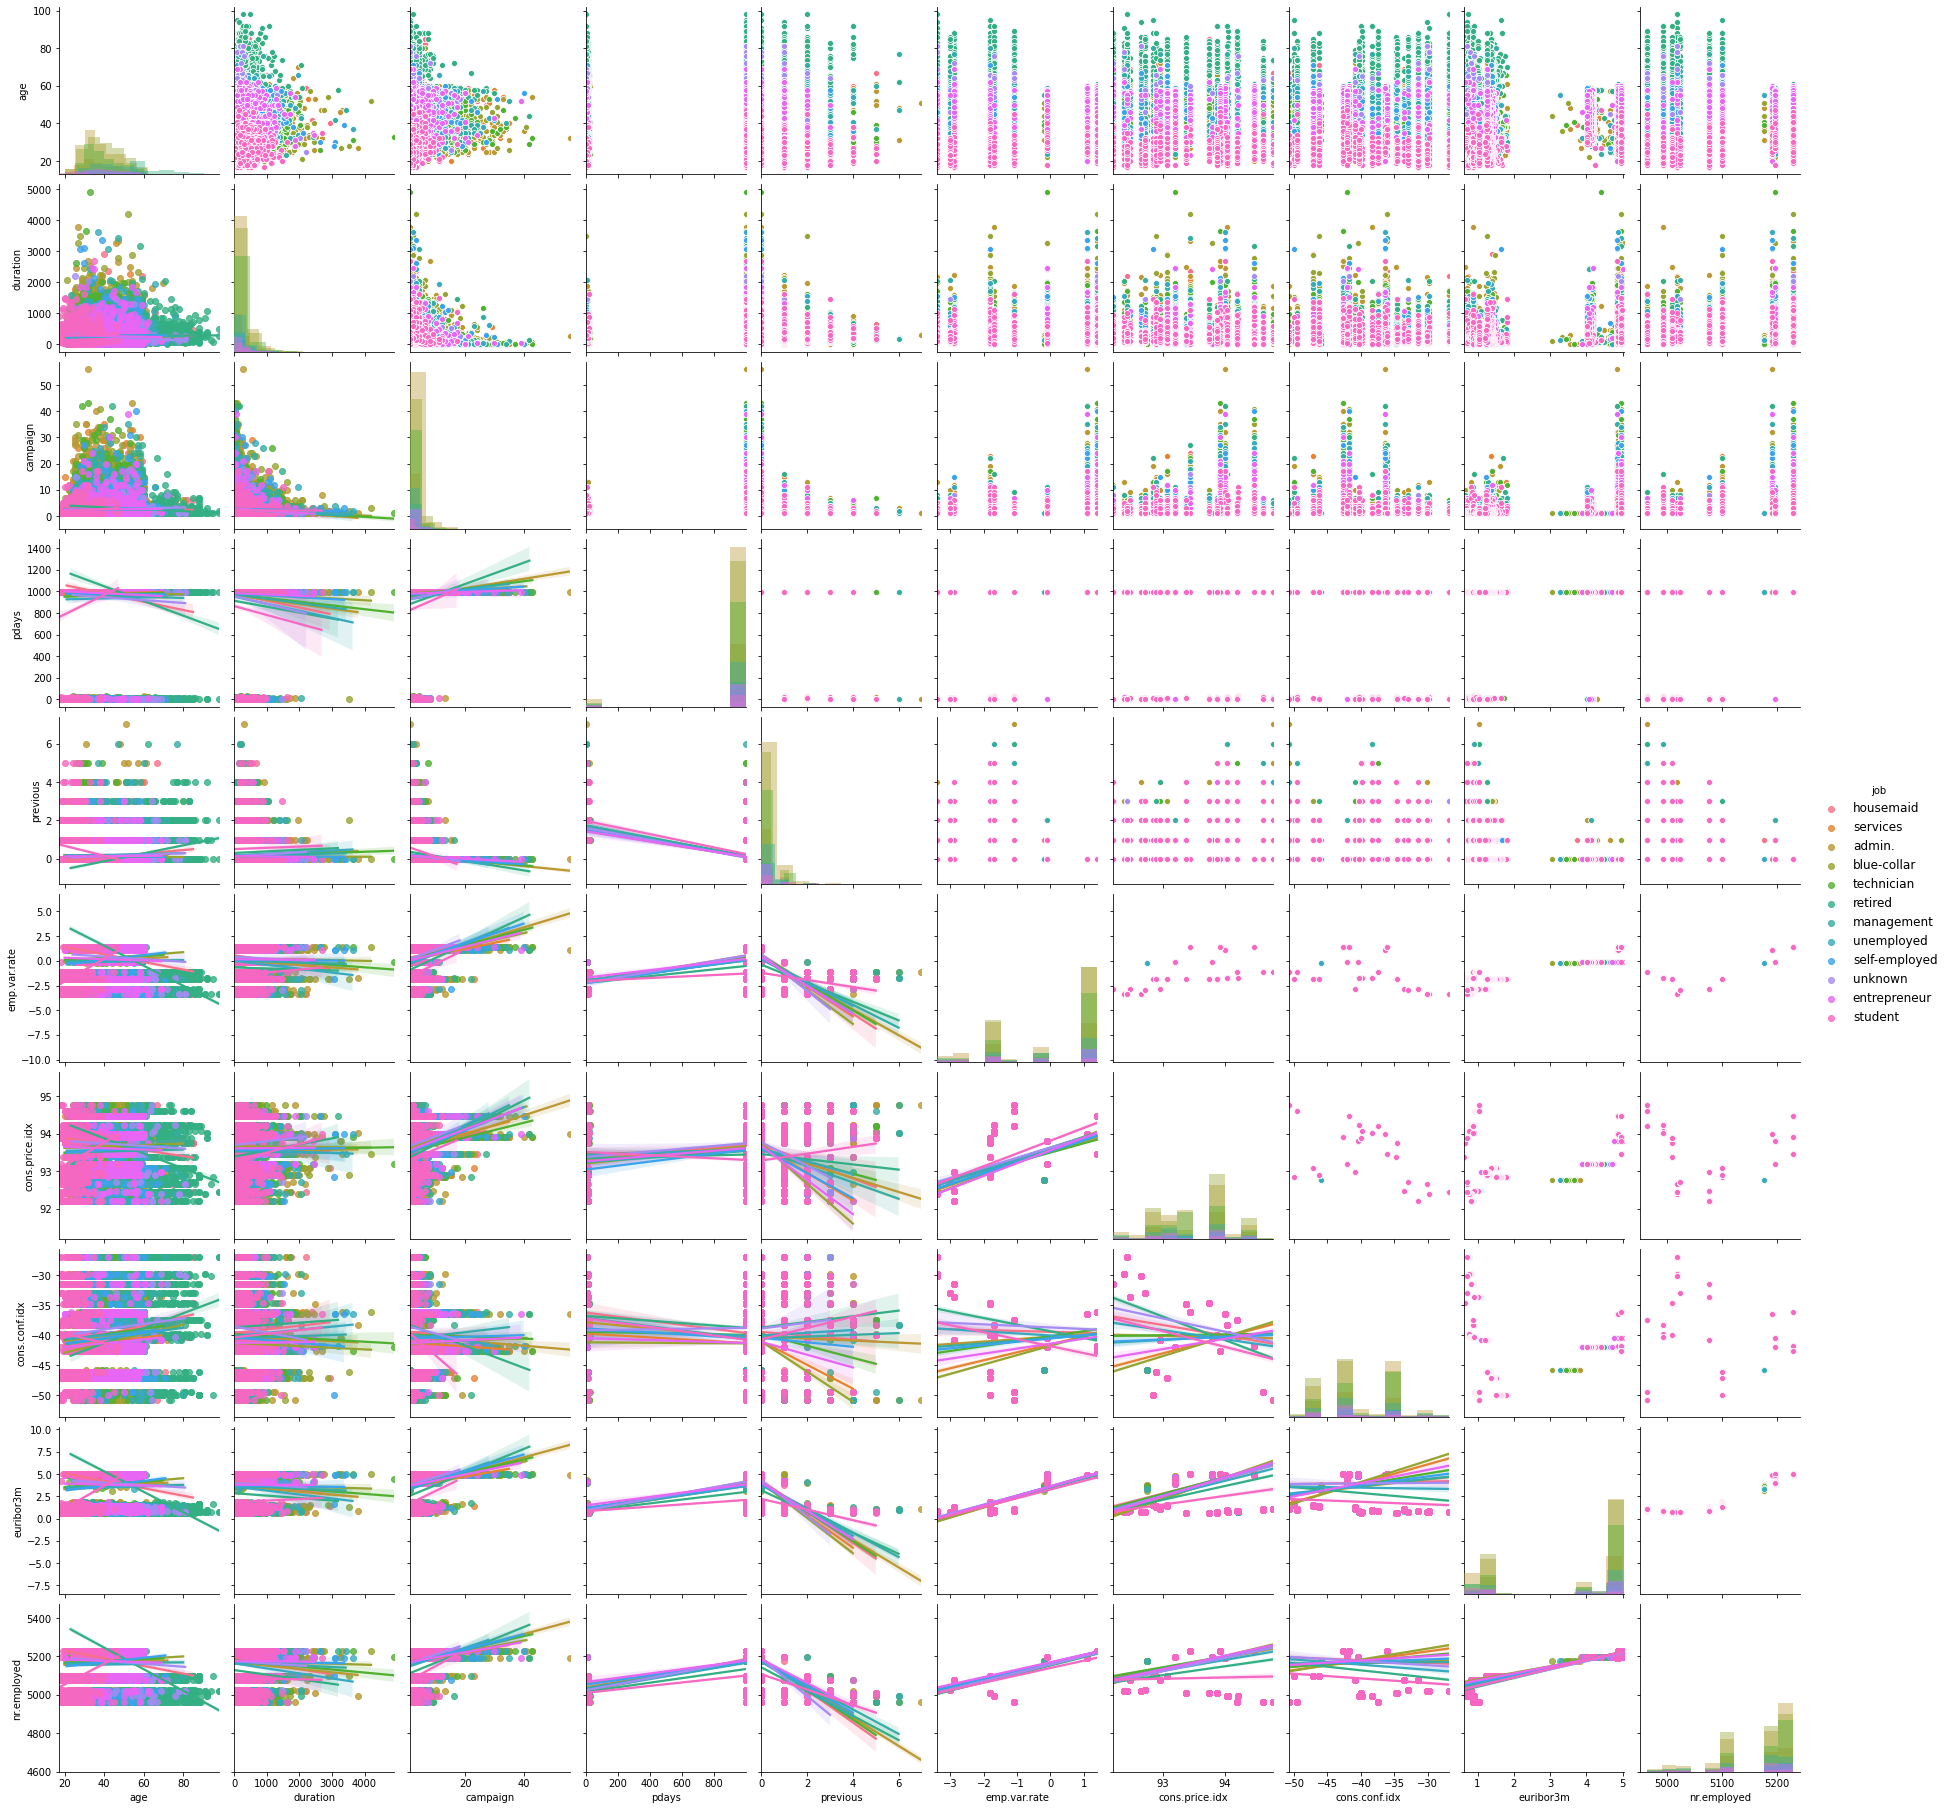

## Target distribution
Let's begin by exploring the target distribution.

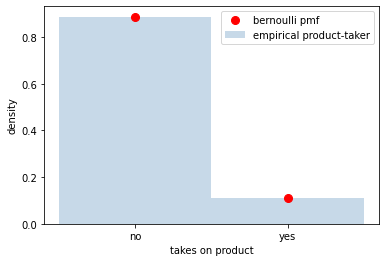

In [7]:
# histogran to evaluate target distribution, the target distribution lookes imbalanced


# theoretical distribution
meanvalue = np.mean( pd.Series(np.searchsorted(['no', 'yes'], data.y.values), data.index))
p = meanvalue

plt.plot((0,1),
        stats.bernoulli.pmf((0,1), p),
        'ro',
        ms=8,
        label='bernoulli pmf')

# empirical
plt.hist(data['y'],density=True, bins=np.linspace(-0.5,1.5,3),
        alpha=0.3,
        color='steelblue',
        edgecolor='none',
        label='empirical product-taker')


plt.ylabel('density')
plt.xlabel('takes on product')
plt.legend(loc=0)
plt.show()

In [219]:
print('bernoulli parameter (p):',p)

bernoulli parameter (p): 0.11265417111780131


Maximum likelihood estimation of the bernoulli parameter is simply the mean of the data.

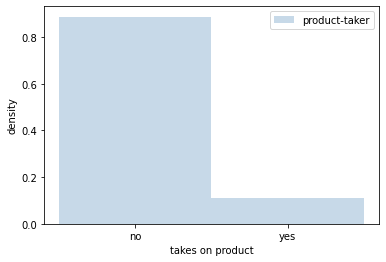

In [8]:
# histogran to evaluate target distribution, the target distribution lookes imbalanced

# empirical
plt.hist(data['y'],density=True, bins=np.linspace(-0.5,1.5,3),
        alpha=0.3,
        color='steelblue',
        edgecolor='none',
        label='product-taker')


plt.ylabel('density')
plt.xlabel('takes on product')
plt.legend(loc=0)
plt.show()

We can see that the target is discrete, and the distribution shows imbalanced data is present. We will need to explore methods of dealing with imbalanced data and probably resample the training set to deal with this. We will not add this to this notebook but rather deal with this in the model building and evaluating notebook in the final stage of our research process.

## Data types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Note hear we might run into problems with `Keras` and the `float64` in the numerical  variables, if so we will have to change them to `float32`.


In [7]:
#int64_cols = ['Displacement','Horsepower', 'Weight', 'Acceleration']


cat_columns = ["job","marital","education","default",
                "housing","loan","contact","month","day_of_week","poutcome"]



numeric_columns =  ["age","duration", "campaign","pdays","previous","emp.var.rate",
                "cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]



# Outer loop 0 to 9, since train.colums has 9 col

for i in range(len(train.columns)):    
    if train.columns[i] in str(cat_columns):
        train[train.columns[i]] = train[train.columns[i]].astype('category')
    
    if train.columns[i] in str(int64_cols):
        train[train.columns[i]] = train[train.columns[i]].astype('float64')
        
#
print("rows:   ",train.shape[0])
print("columns:",train.shape[1])
        
# Confirm whether the changes have been applied successfully
train.info()


NameError: name 'int64_cols' is not defined

## Numerical variables


In [90]:
print('Number of numerical variables: ', len(numeric_columns))

Number of numerical variables:  10


In [136]:
#  let's male a list of discrete variables
num_vars = numeric_columns

discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var ]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  3


In [178]:
trainynum = train.copy()

trainynum.y = trainynum.y.eq('yes').mul(1)

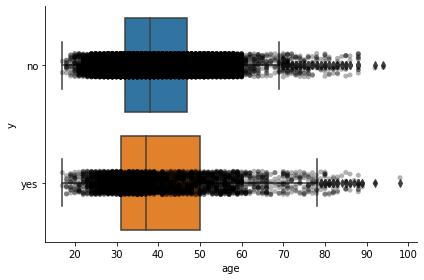

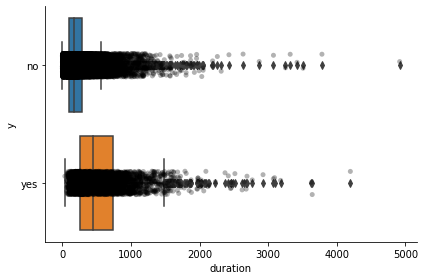

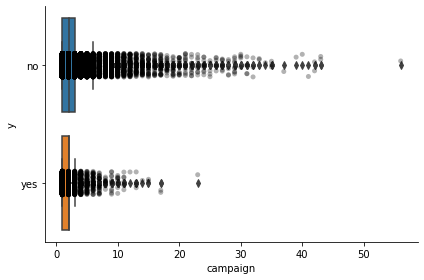

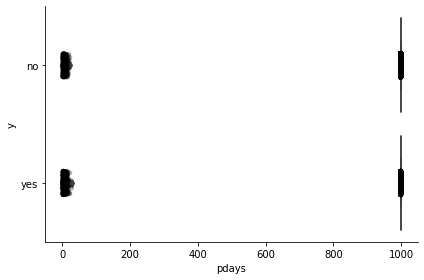

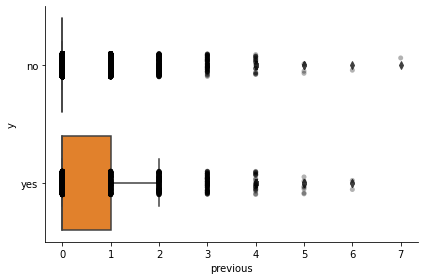

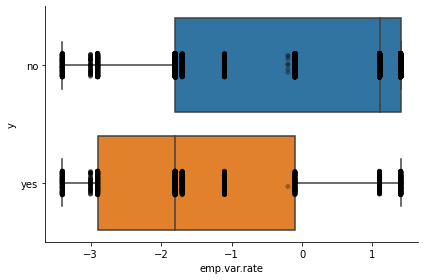

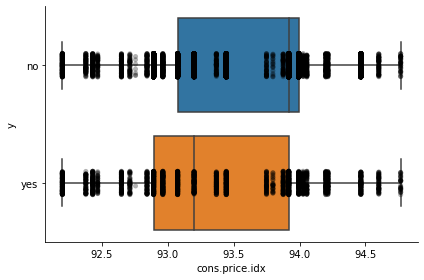

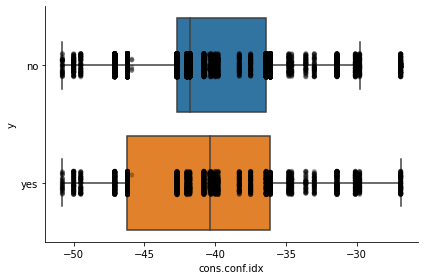

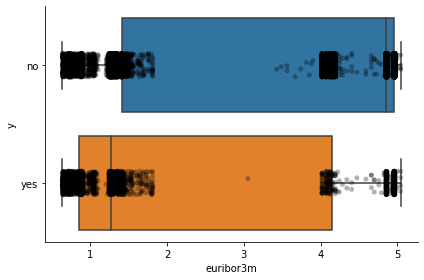

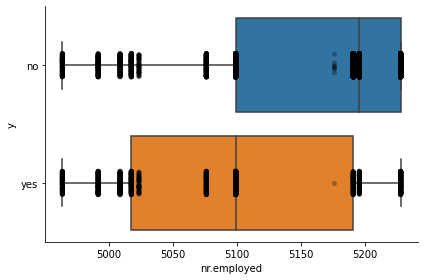

In [175]:
for var in numeric_columns:
    # make boxplot with Catplot
    sns.catplot(x=var, y='y', data=train, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='y', data=train, jitter=0.1, alpha=0.3, color='k')
    plt.show()

In [ ]:
LOG_NORM_VARS = ["age","duration","campaign",
                 "pdays","nr.employed"]

In [512]:
for var in LOG_NORM_VARS:
    print(var,  np.sum(data[var]<=0) > 0)

age False
duration True
campaign False
pdays True
nr.employed False


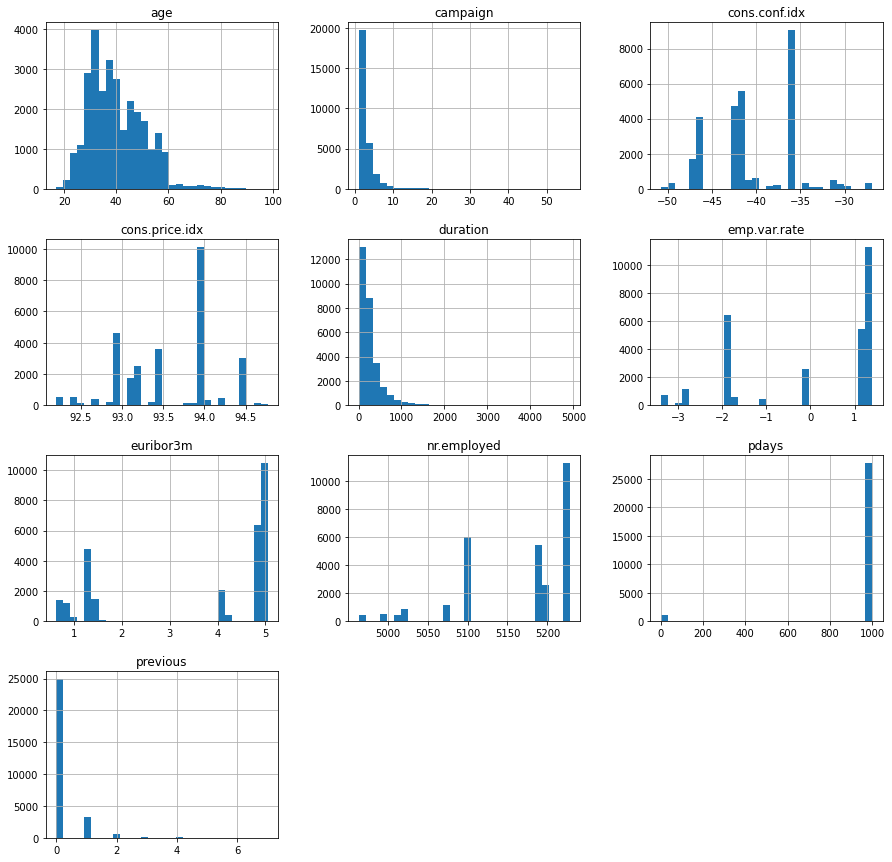

In [197]:
# lets plot histograms for all continuous variables

train[numeric_columns].hist(bins=30, figsize=(15,15))
plt.show()

In [218]:
# lets plot histograms for all continuous variables
numeric_columns =  ["age","duration", "campaign","pdays","previous","emp.var.rate",
                "cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]


temp = ['y'] + list(numeric_columns) 
print(temp)

temp0 = train[temp]


['y', 'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


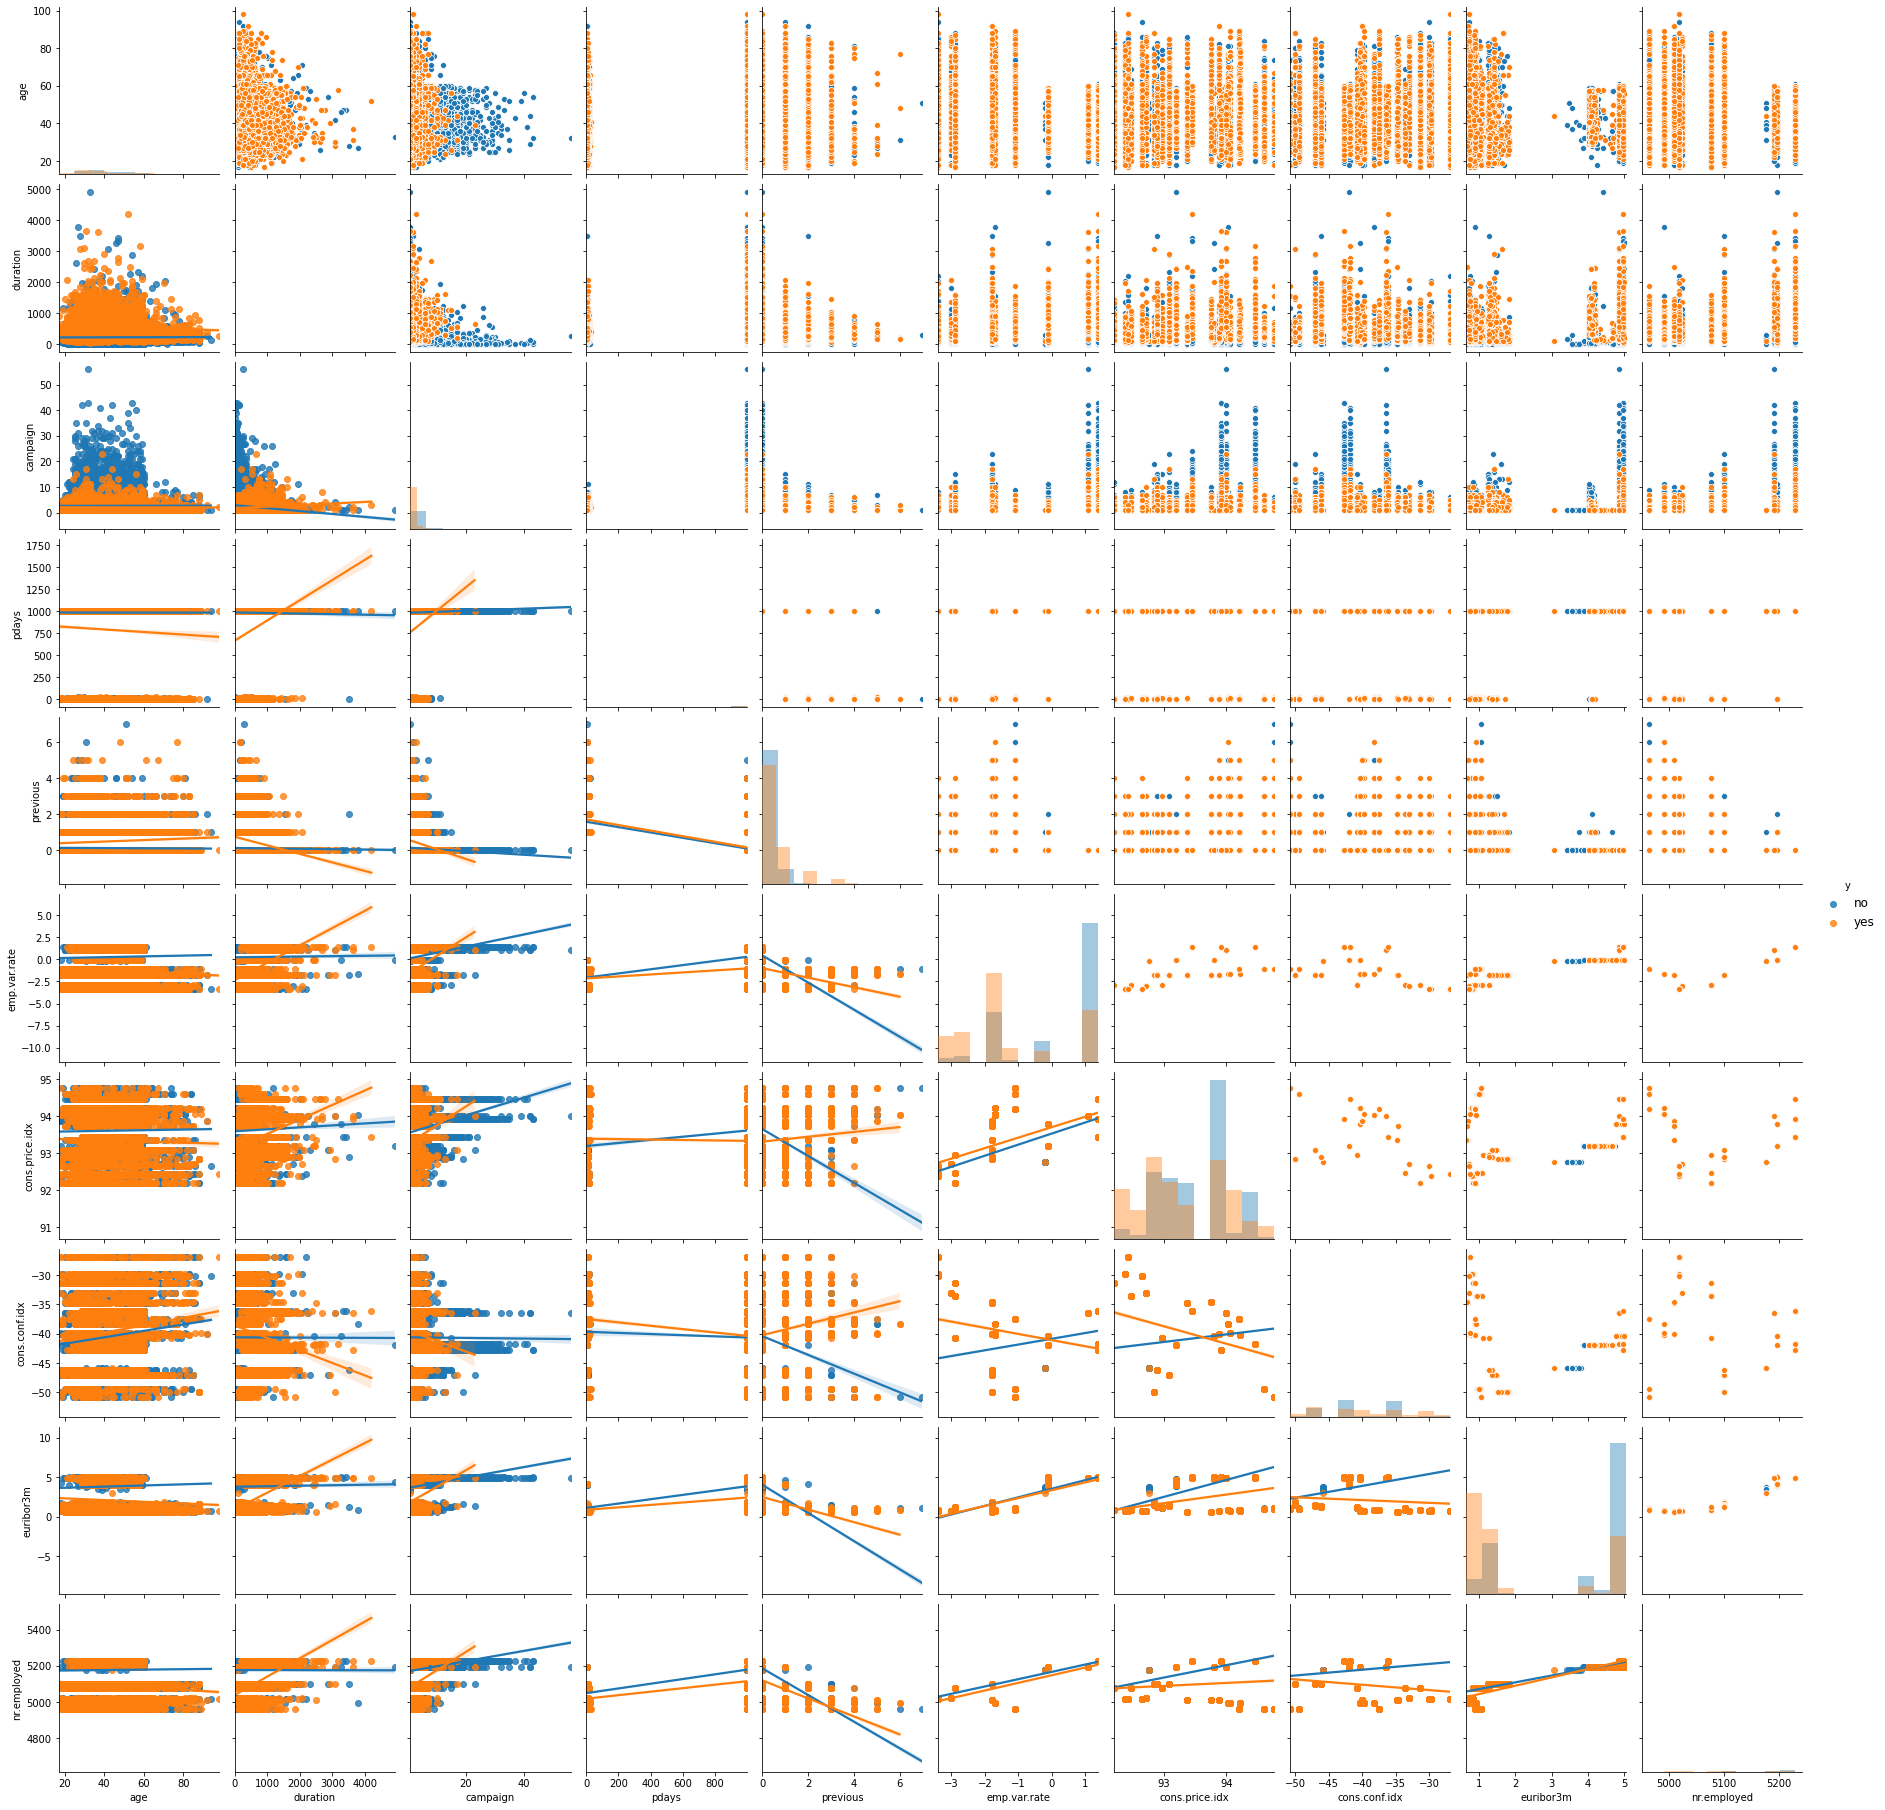

In [220]:
g = sns.PairGrid(temp0.loc[:, temp0.columns], hue="y")
g = g.map_diag(plt.hist, alpha=0.4, density=True)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.regplot)
g = g.add_legend(fontsize=12)

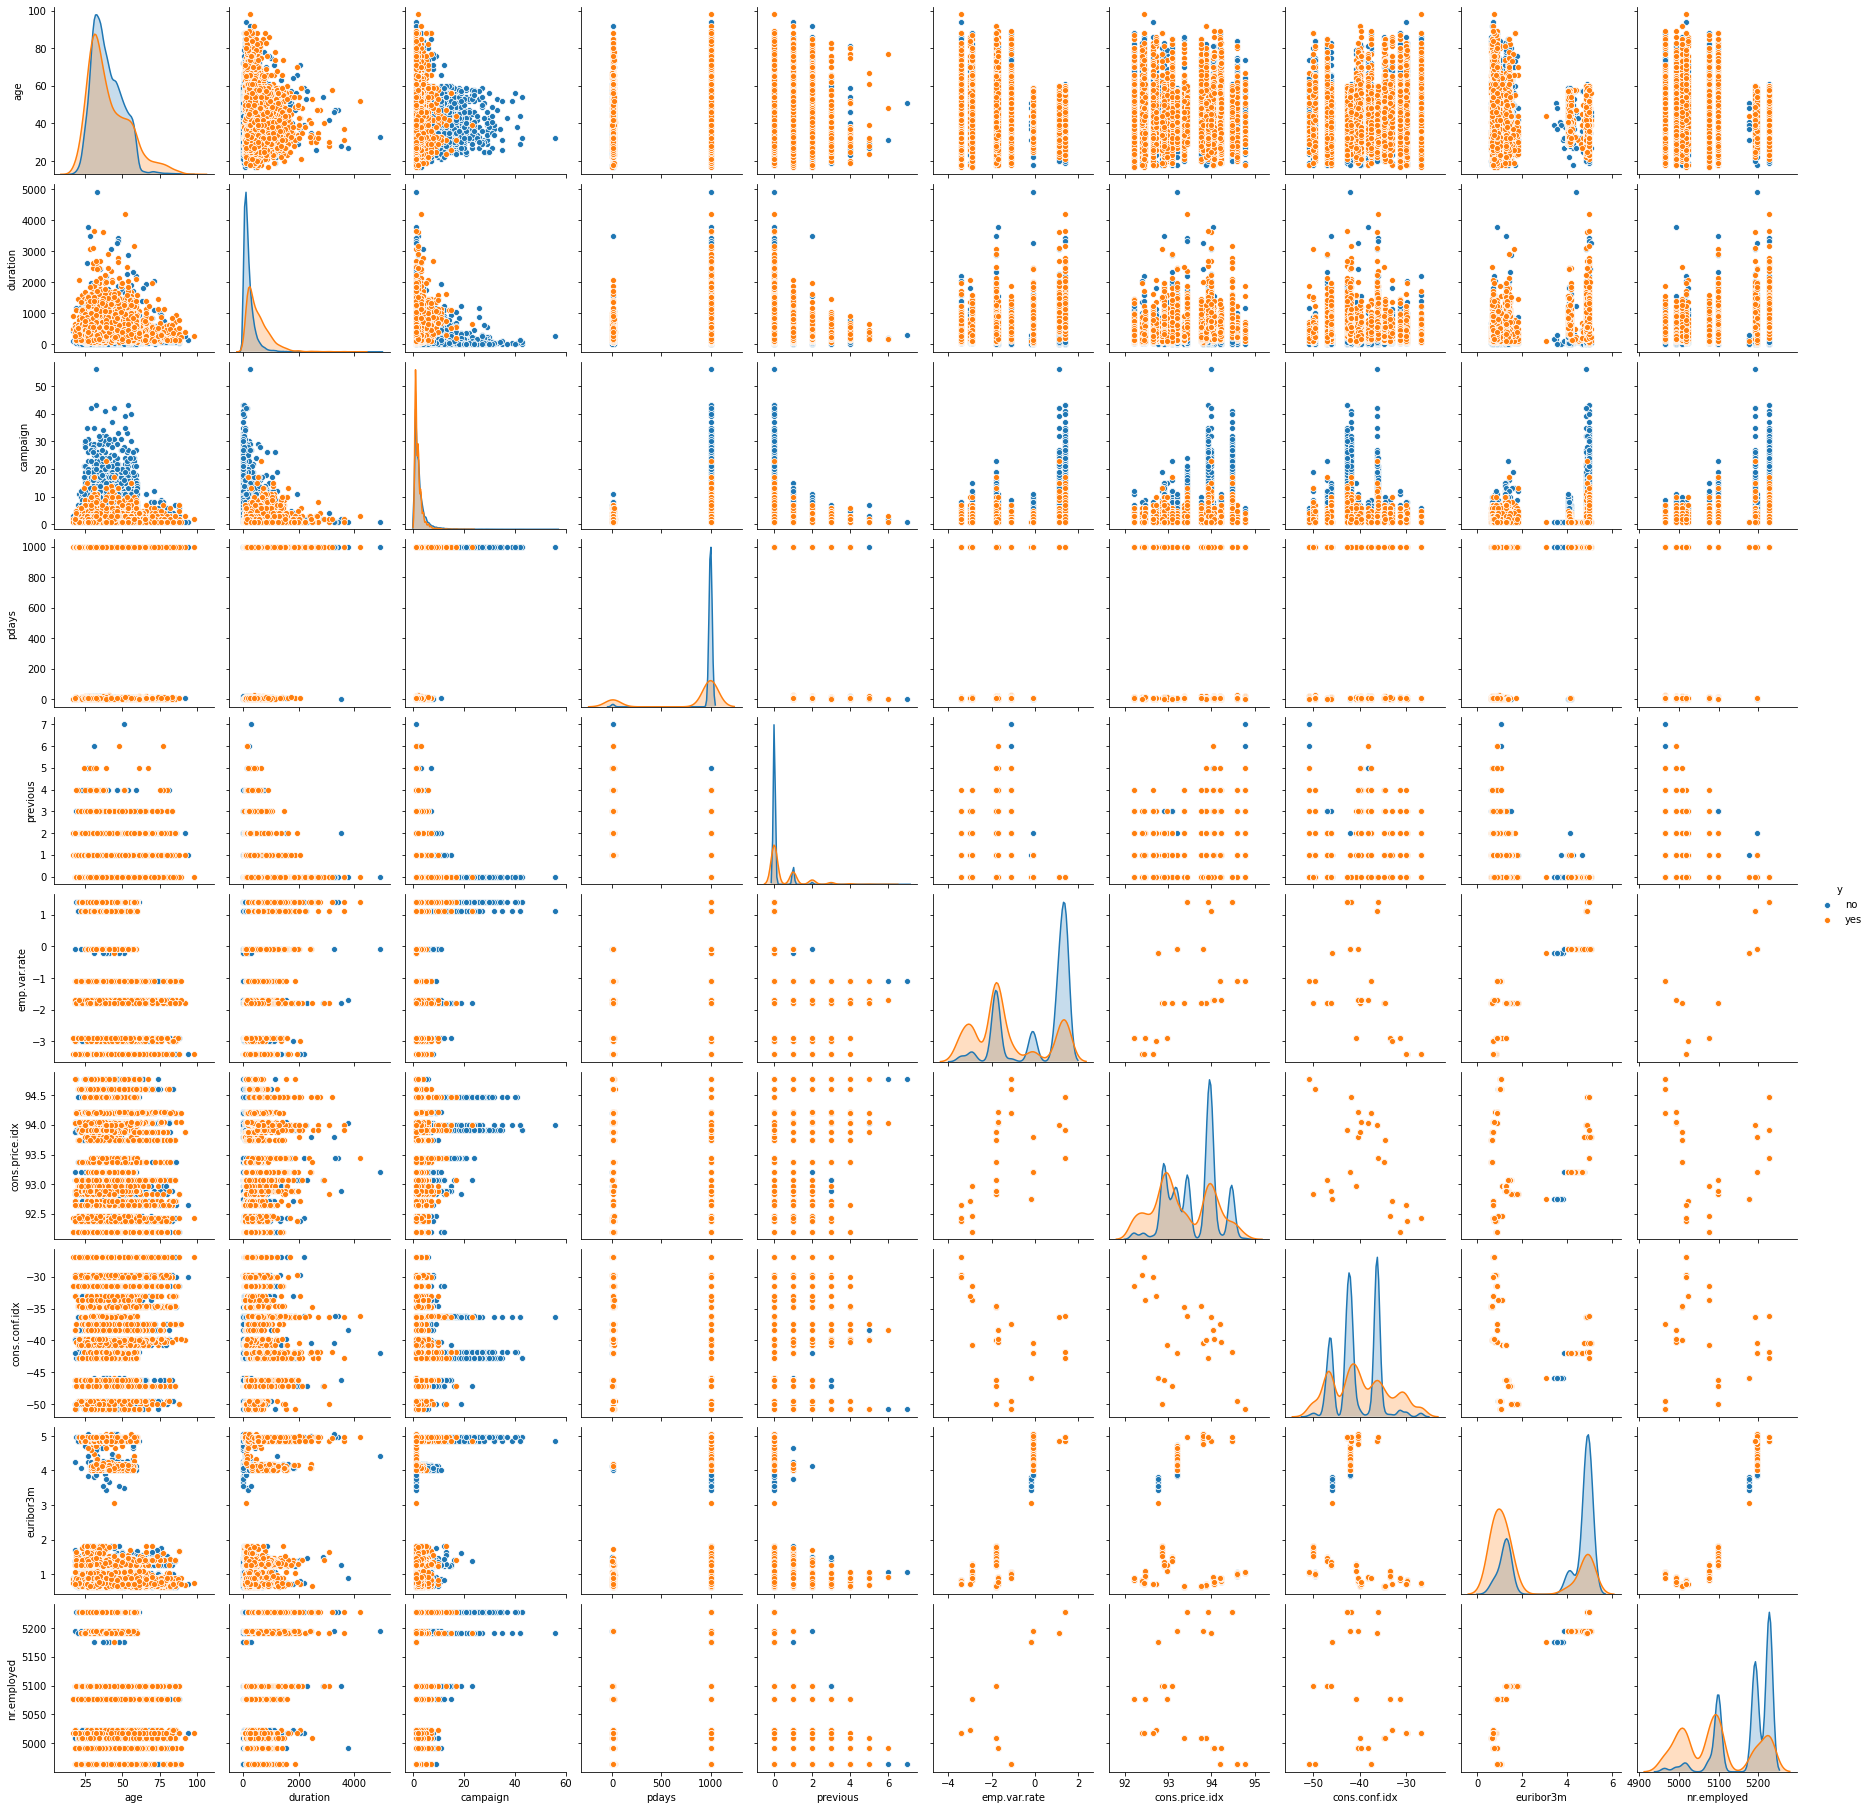

In [221]:
sns.pairplot(temp0, hue="y")
plt.show()

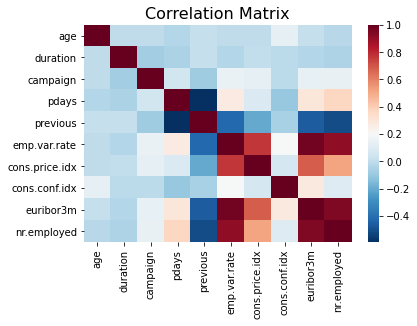

In [226]:
# Separate both dataframes into 
numeric_train = train.select_dtypes(exclude="object")
categorical_train = train.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [140]:
train.nunique()

age                 76
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1435
campaign            42
pdays               25
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          312
nr.employed         11
y                    2
dtype: int64

### Scale necassary variables

There are 2 main ways of preprocessing numeric variables in python, either standardizing or normalizing.


> ``One of the most common forms of pre-processing consists of a simple linear rescaling of the input variables. ''- Bishop

A  reasonable assumption, is that scaling would allow the covariates to perform better in predicting the response . We could use either a *normalization* (scale between 0 and 1 as $\frac{x-\min}{\max-\min}$) or a *standarization* ( subtract the mean and divide the result by the variance as $\frac{x-\hat{\mu}}{\hat{\sigma}}$) to do so.

Standardization is a preprocessing method used to transform continuous data to make it look normally distributed. Many models assume that the data you are training on is normally distributed, and if it isn't, you risk biasing your model.

If a feature in your dataset has a variance that's an order of magnitude or more greater than the other features, this could impact the model's ability to learn from other features in the dataset.

 Modeling a dataset that contains continuous features that are on different scales is another scenario to watch out for. 
 
 Generally we would use a log normal transformation if we wanted to preprocess a variable in one column, if all the values where positive. 
 
 If we wanted to  have numbers that are relatively close within the column, but not across columns. If we look at the variance, it's relatively low across columns. To better model this data, scaling would be a good choice here.  
 
 There are models that operate in the nonlinear space.

*  We normalize using  ` sklearn.preprocessing import normalize`.
*  then perform the log normal tansformation  using  ` sklearn.preprocessing import normalize`.


References
*  [Preprocessing in scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html)

https://campus.datacamp.com/courses/preprocessing-for-machine-learning-in-python






* In passing, it is fair to assume that we could change the year to a numeric variable from a categorical variable. This is as in production, we would anticipate the year to essentially be a real number with numerous levels. 

In [8]:
# disregard the response "MPG" first 

temp = train[numeric_columns]

# Before scaling: 5 number summary
temp.describe().transpose().round()

count    mean    std     min     25%     50%     75%     max
age             28831.0    40.0   10.0    17.0    32.0    38.0    47.0    98.0
duration        28831.0   259.0  263.0     0.0   103.0   180.0   320.0  4918.0
campaign        28831.0     3.0    3.0     1.0     1.0     2.0     3.0    56.0
pdays           28831.0   962.0  188.0     0.0   999.0   999.0   999.0   999.0
previous        28831.0     0.0    0.0     0.0     0.0     0.0     0.0     7.0
emp.var.rate    28831.0     0.0    2.0    -3.0    -2.0     1.0     1.0     1.0
cons.price.idx  28831.0    94.0    1.0    92.0    93.0    94.0    94.0    95.0
cons.conf.idx   28831.0   -41.0    5.0   -51.0   -43.0   -42.0   -36.0   -27.0
euribor3m       28831.0     4.0    2.0     1.0     1.0     5.0     5.0     5.0
nr.employed     28831.0  5167.0   72.0  4964.0  5099.0  5191.0  5228.0  5228.0

In [11]:
X_train0 = X_train.copy()

NameError: name 'X_train' is not defined

In [10]:
X_train = X_train0

NameError: name 'X_train0' is not defined

In [12]:
# disregard the response "MPG" first 

temp = X_train[numeric_columns]

# Before scaling: 5 number summary
temp.describe().transpose().round()

NameError: name 'X_train' is not defined

In [586]:
# disregard the response "MPG" first 

temp = X_train[numeric_columns]

# Before scaling: 5 number summary
temp.describe().transpose().round()

count   mean    std   min    25%    50%    75%     max
age             28831.0    4.0    0.0   3.0    3.0    4.0    4.0     5.0
duration        28831.0  259.0  263.0   0.0  103.0  180.0  320.0  4918.0
campaign        28831.0    1.0    1.0   0.0    0.0    1.0    1.0     4.0
pdays           28831.0  962.0  188.0   0.0  999.0  999.0  999.0   999.0
previous        28831.0    0.0    0.0   0.0    0.0    0.0    0.0     7.0
emp.var.rate    28831.0    0.0    2.0  -3.0   -2.0    1.0    1.0     1.0
cons.price.idx  28831.0   94.0    1.0  92.0   93.0   94.0   94.0    95.0
cons.conf.idx   28831.0  -41.0    5.0 -51.0  -43.0  -42.0  -36.0   -27.0
euribor3m       28831.0    4.0    2.0   1.0    1.0    5.0    5.0     5.0
nr.employed     28831.0    9.0    0.0   9.0    9.0    9.0    9.0     9.0

In [585]:
# check that test set does not contain null values in the engineered variables

LOG_NORM_VARS = ["age","campaign","nr.employed"]

for var in LOG_NORM_VARS:
    X_train[var] = np.log(X_train[var])
    X_test[var] = np.log(X_test[var])

# check that test set does not contain null values in the engineered variables
[var for var in LOG_NORM_VARS if X_train[var].isnull().sum() > 0]

[]

In [556]:
# same for train set
[var for var in LOG_NORM_VARS if X_train[var].isnull().sum() > 0]

['age', 'duration', 'campaign', 'nr.employed']

In [557]:
X_train

age job marital education default housing loan contact  month  \
7019   NaN   3       1         1       2       1    2       1      5   
27175  NaN   5       2         2       2       1    2       1     11   
15817  NaN   3       2         1       2       2    2       2      7   
40971  NaN   6       3         3       2       1    2       2     10   
8467   NaN   5       1         3       2       1    2       1      6   
...    ...  ..     ...       ...     ...     ...  ...     ...    ...   
16304  NaN   0       1         5       2       2    2       2      7   
79     NaN   4       1         2       0       2    2       1      5   
12119  NaN   8       1         6       2       2    2       1      6   
14147  NaN   1       2         3       2       1    1       2      7   
38408  NaN   6       1         3       2       1    2       2     10   

       day_of_week  duration  campaign   pdays  previous poutcome  \
7019             4       NaN       NaN  1.9325         0        1   
27175            5       NaN       NaN  1.9325         0        1   
15817            1       NaN       NaN  1.9325         0        1   
40971            1       NaN       NaN  1.9325         2        2   
8467             2       NaN       NaN  1.9325         0        1   
...            ...       ...       ...     ...       ...      ...   
16304            2       NaN       NaN  1.9325         0        1   
79               1       NaN       NaN  1.9325         0        1   
12119            1       NaN       NaN  1.9325         0        1   
14147            1       NaN       NaN  1.9325         0        1   
38408            3       NaN       NaN  1.9325         0        1   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
7019            1.1          93.994          -36.4      4.860          NaN  
27175          -0.1          93.200          -42.0      4.021          NaN  
15817           1.4          93.918          -42.7      4.960          NaN  
40971          -1.1          94.601          -49.5      1.000          NaN  
8467            1.4          94.465          -41.8      4.864          NaN  
...             ...             ...            ...        ...          ...  
16304           1.4          93.918          -42.7      4.961          NaN  
79              1.1          93.994          -36.4      4.857          NaN  
12119           1.4          94.465          -41.8      4.947          NaN  
14147           1.4          93.918          -42.7      4.962          NaN  
38408          -3.4          92.431          -26.9      0.735          NaN  

[28831 rows x 20 columns]

## Temporal variables

No clear temporal variables where found in this dataset.

## Categorical variables

Categorical variables with more than two possible values are called polytomous variables, we deal with these by 


A  nice example for illustrating the differences in the encoding found on [link](https://stats.stackexchange.com/questions/325263/binary-encoding-vs-one-hot-encoding), we can also find some great explanations on dealing with categorical variables in Python ([link](https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/)).

```
-----------------------------------------------
|   Level   | "Decimal  | Binary   | One hot  |
|           | encoding" | encoding | encoding |
-----------------------------------------------
| No        |     0     |    000   |  000001  |
| Grade 1   |     1     |    001   |  000010  |
| Grade 2   |     2     |    010   |  000100  |
| Grade 3   |     3     |    011   |  001000  |
| Grade 4   |     4     |    100   |  010000  |
| Grade 5   |     5     |    101   |  100000  |
-----------------------------------------------
```

integer encode - cylinder
integer encode - Year
one hot encode - Country

Explanation on why one-hot encode ([link](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/))


So that the numeric variables are `['MPG', 'Displacement', 'Horsepower','Weight',  'Acceleration','Model Year','Cylinders']
, "Manufacturer"]`

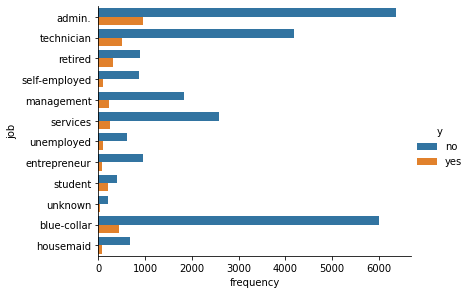

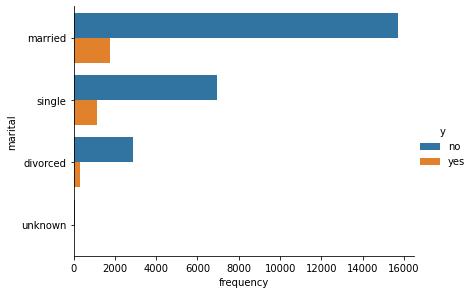

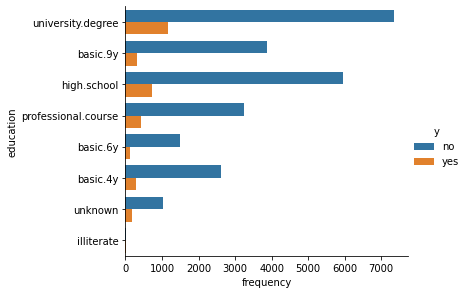

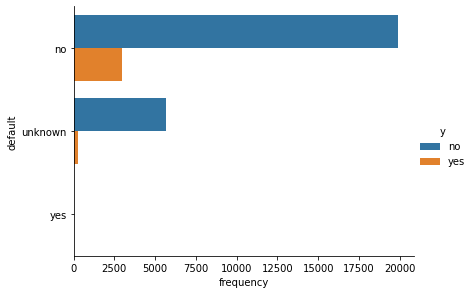

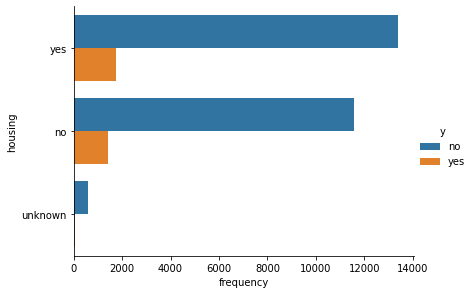

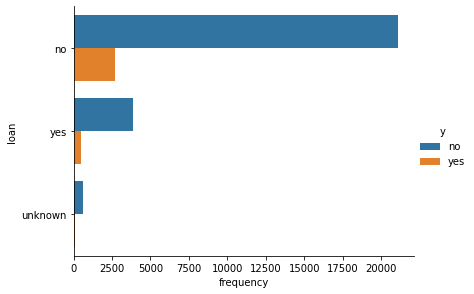

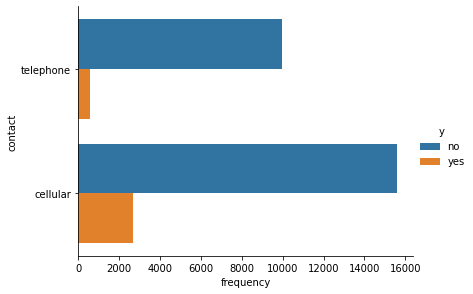

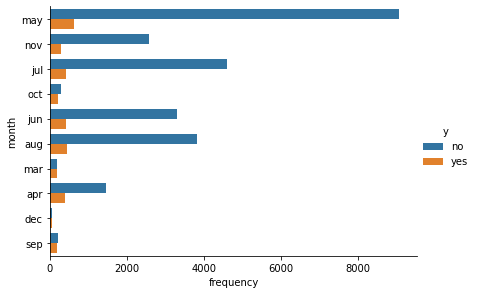

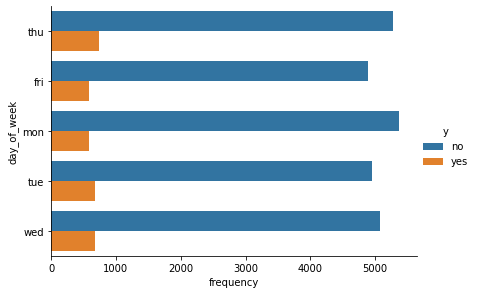

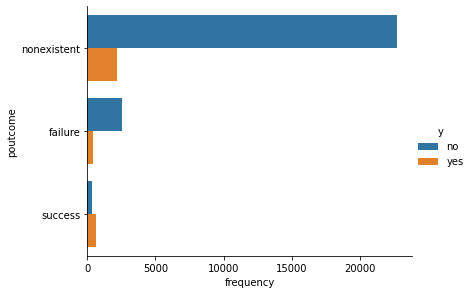

In [173]:
# Look at relationship between each categorical variable and the response 'y' representing 'product-takers'
# distribution.

for var in cat_columns:
    # make boxplot with Catplot
    sns.catplot(y=var, hue='y', kind="count",data=train, height=4, aspect=1.5)
    # add data points to boxplot with stripplot  
    plt.xlabel("frequency")
    plt.show()

In [238]:
np.unique(data['month'])

array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep'], dtype=object)

### High cardinality

Let's go ahead and investigate now if there are labels that are present only in a small number of houses:

In [273]:
def without_hue(plot, feature = train['job'], val= 'job'):
    '''
    Function to add text on top of sea born count plot (a bit hard coded here)
    '''
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/np.sum(train[val].value_counts()))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12, rotation =50)
    plt.xticks(rotation=50)
    plt.show()

We found that 2 main variables have high cardinality `jobs` and `education`

### rare labels

In [278]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['y'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

In [279]:
len(cat_columns)

# print categories that are present in less than
# 1 % of the observations

for var in cat_columns:
    print(analyse_rare_labels(train, var, 0.01))
    print()

job
unknown    0.007873
Name: y, dtype: float64

marital
unknown    0.002012
Name: y, dtype: float64

education
illiterate    0.000416
Name: y, dtype: float64

default
yes    0.000069
Name: y, dtype: float64

Series([], Name: y, dtype: float64)

Series([], Name: y, dtype: float64)

Series([], Name: y, dtype: float64)

Series([], Name: y, dtype: float64)

Series([], Name: y, dtype: float64)

Series([], Name: y, dtype: float64)



In [281]:
# print categories that are present in less than
# 5 % of the observations

for var in cat_columns:
    print(analyse_rare_labels(train, var, 0.05))
    print()

job
entrepreneur     0.035691
housemaid        0.026152
retired          0.041448
self-employed    0.033852
student          0.021088
unemployed       0.024834
unknown          0.007873
Name: y, dtype: float64

marital
unknown    0.002012
Name: y, dtype: float64

education
illiterate    0.000416
unknown       0.042038
Name: y, dtype: float64

default
yes    0.000069
Name: y, dtype: float64

housing
unknown    0.023794
Name: y, dtype: float64

loan
unknown    0.023794
Name: y, dtype: float64

Series([], Name: y, dtype: float64)

Series([], Name: y, dtype: float64)

Series([], Name: y, dtype: float64)

poutcome
success    0.033575
Name: y, dtype: float64



In [282]:
# print categories that are present in less than
# 10 % of the observations

for var in cat_columns:
    print(analyse_rare_labels(train, var, 0.10))
    print()

job
entrepreneur     0.035691
housemaid        0.026152
management       0.070931
retired          0.041448
self-employed    0.033852
services         0.097811
student          0.021088
unemployed       0.024834
unknown          0.007873
Name: y, dtype: float64

marital
unknown    0.002012
Name: y, dtype: float64

education
basic.6y      0.056467
illiterate    0.000416
unknown       0.042038
Name: y, dtype: float64

default
yes    0.000069
Name: y, dtype: float64

housing
unknown    0.023794
Name: y, dtype: float64

loan
unknown    0.023794
Name: y, dtype: float64

Series([], Name: y, dtype: float64)

Series([], Name: y, dtype: float64)

Series([], Name: y, dtype: float64)

poutcome
success    0.033575
Name: y, dtype: float64



### High cardinality`

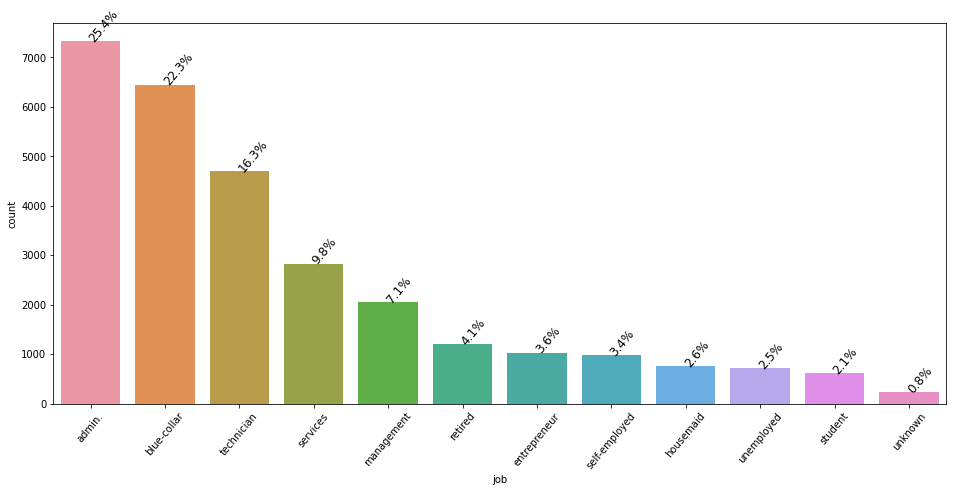

In [283]:
## High cardinality

fig, ax = plt.subplots(figsize=(16, 7))
    
ax = sns.countplot(train['job'],order = train['job'].value_counts().index)
without_hue(ax, train['job'].value_counts().index)

#plt.savefig('Manufacturer.png', bbox_inches='tight', type='png')
plt.show()

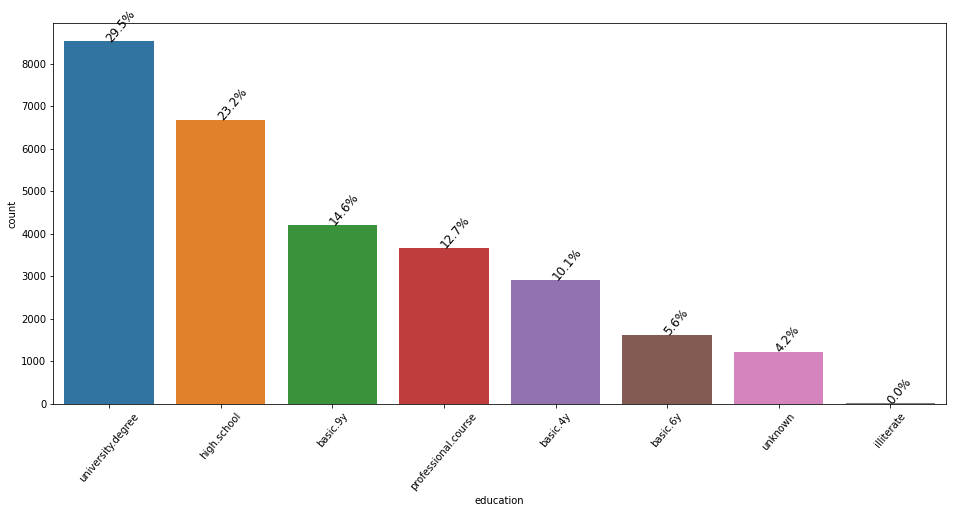

In [284]:
fig, ax = plt.subplots(figsize=(16, 7))
    
ax = sns.countplot(train['education'],order = train['education'].value_counts().index)
without_hue(ax, train['education'].value_counts().index)

#plt.savefig('Manufacturer.png', bbox_inches='tight', type='png')
plt.show()

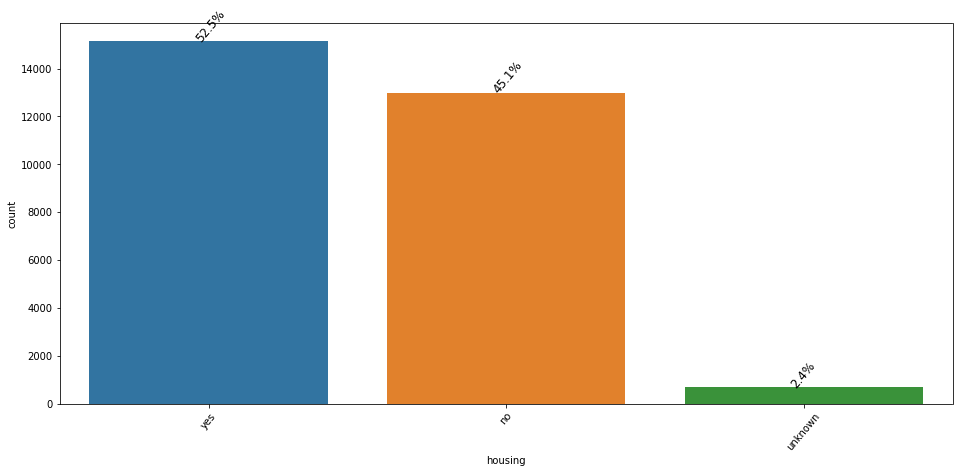

In [285]:
fig, ax = plt.subplots(figsize=(16, 7))
    
ax = sns.countplot(train['housing'],order = train['housing'].value_counts().index)
without_hue(ax, train['housing'].value_counts().index)

#plt.savefig('Manufacturer.png', bbox_inches='tight', type='png')
plt.show()

### One-hot encoding

### Integer encoding

In [286]:
# Prepare for integer encoding, account for logical variables that are not in the data
# e.g. there are 12 months in a year
# e.g. what about if the system mistakenly has a weekend day
# e.g. what do you do if you have an nan


train.loc[:,'month'] = train.loc[:,'month'].map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr',  5: 'may',
                                           6: 'jun', 7: 'jul', 8: 'aug' ,9: 'sep' ,10: 'oct',
                                          11: 'nov',12: 'dec' })

train.loc[:,'month'] = train.loc[:,'month'].map({1: 'mon', 2: 'tue', 3: 'wed', 4: 'thur',  5: 'fri',
                                           6: 'sat', 7: 'sun' })

In [287]:
train

age          job   marital          education  default housing loan  \
7019    31       admin.   married  university.degree       no     yes   no   
27175   51   technician    single           basic.9y       no     yes   no   
15817   39       admin.    single  university.degree       no      no   no   
40971   68      retired  divorced        high.school       no     yes   no   
8467    37   technician   married        high.school       no     yes   no   
...    ...          ...       ...                ...      ...     ...  ...   
16304   44      unknown   married           basic.6y       no      no   no   
79      42  blue-collar   married           basic.9y  unknown      no   no   
12119   39   unemployed   married           basic.4y       no      no   no   
14147   22    housemaid    single        high.school       no     yes  yes   
38408   70      retired   married        high.school       no     yes   no   

         contact month day_of_week  ...  previous     poutcome  emp.var.rate  \
7019   telephone   NaN         thu  ...         0  nonexistent           1.1   
27175  telephone   NaN         fri  ...         0  nonexistent          -0.1   
15817   cellular   NaN         mon  ...         0  nonexistent           1.4   
40971   cellular   NaN         mon  ...         2      failure          -1.1   
8467   telephone   NaN         tue  ...         0  nonexistent           1.4   
...          ...   ...         ...  ...       ...          ...           ...   
16304   cellular   NaN         tue  ...         0  nonexistent           1.4   
79     telephone   NaN         mon  ...         0  nonexistent           1.1   
12119  telephone   NaN         mon  ...         0  nonexistent           1.4   
14147   cellular   NaN         mon  ...         0  nonexistent           1.4   
38408   cellular   NaN         wed  ...         0  nonexistent          -3.4   

       cons.price.idx cons.conf.idx  euribor3m  nr.employed   y  monthnum       
7019           93.994         -36.4      4.860       5191.0  no       may  NaN  
27175          93.200         -42.0      4.021       5195.8  no       nov  NaN  
15817          93.918         -42.7      4.960       5228.1  no       jul  NaN  
40971          94.601         -49.5      1.000       4963.6  no       oct  NaN  
8467           94.465         -41.8      4.864       5228.1  no       jun  NaN  
...               ...           ...        ...          ...  ..       ...  ...  
16304          93.918         -42.7      4.961       5228.1  no       jul  NaN  
79             93.994         -36.4      4.857       5191.0  no       may  NaN  
12119          94.465         -41.8      4.947       5228.1  no       jun  NaN  
14147          93.918         -42.7      4.962       5228.1  no       jul  NaN  
38408          92.431         -26.9      0.735       5017.5  no       oct  NaN  

[28831 rows x 23 columns]

In [ ]:
fig, ax = plt.subplots(figsize=(16, 7))

def without_hue(plot, feature=train['Manufacturer']):
    '''
    Function to add text on top of sea born count plot (a bit hard coded here)
    '''
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/np.sum(train['Manufacturer'].value_counts()))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12, rotation =50)
    plt.xticks(rotation=50)
    plt.show()

ax = sns.countplot(train['Manufacturer'],order = train['Manufacturer'].value_counts().index)
without_hue(ax, train['Manufacturer'].value_counts().index)

#plt.savefig('Manufacturer.png', bbox_inches='tight', type='png')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 7))

def without_hue(plot, feature=train['Manufacturer']):
    '''
    Function to add text on top of sea born count plot (a bit hard coded here)
    '''
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/np.sum(train['Manufacturer'].value_counts()))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12, rotation =50)
    plt.xticks(rotation=50)
    plt.show()

ax = sns.countplot(train['Manufacturer'],order = train['Manufacturer'].value_counts().index)
without_hue(ax, train['Manufacturer'].value_counts().index)

#plt.savefig('Manufacturer.png', bbox_inches='tight', type='png')
plt.show()

In [73]:
# Scatter plot using numeric values

numeric_columns =  ["age","duration", "campaign","pdays","previous","emp.var.rate",
                "cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]

g = sns.PairGrid(data.loc[:, data.columns != "y"])
g = g.map_diag(plt.hist, alpha=0.4)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.regplot)

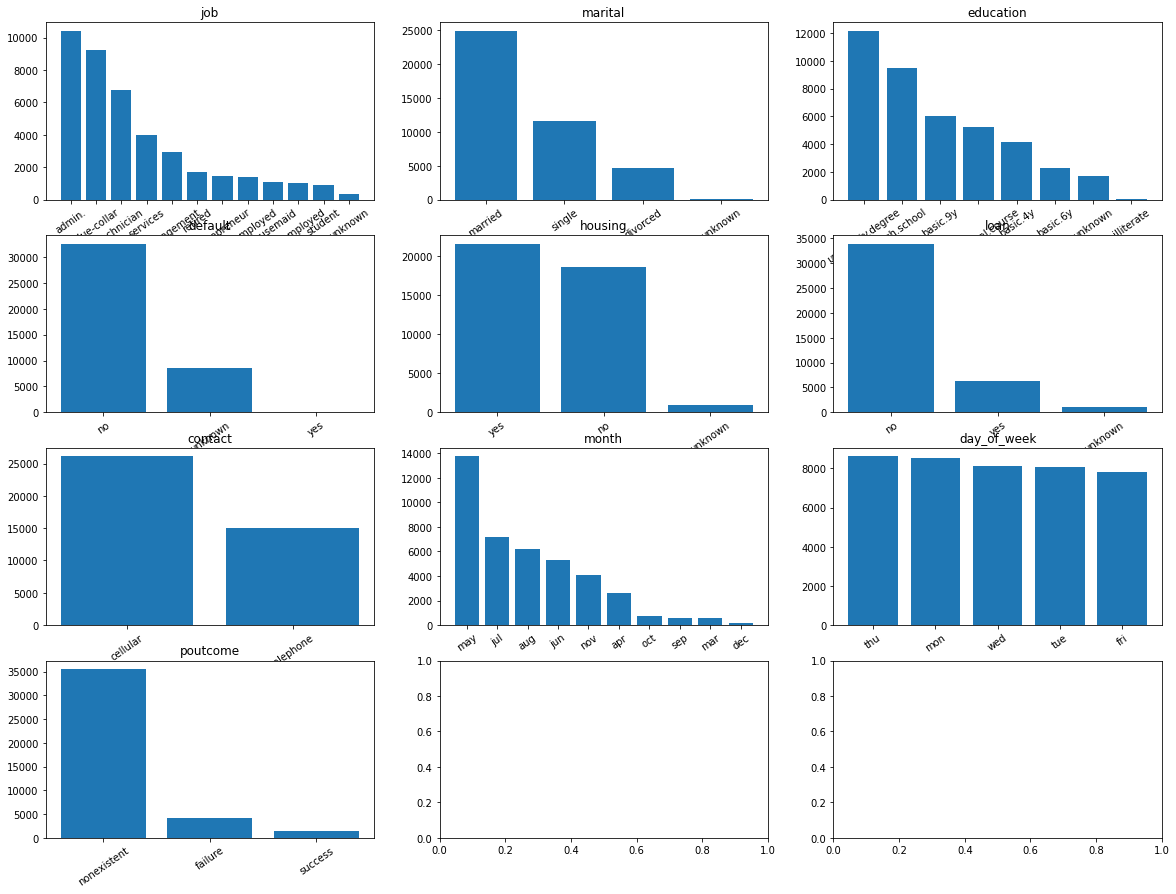

In [252]:
column_names = ["age","job","marital","education","default",
                "housing","loan","contact","month","day_of_week","duration",
                "campaign","pdays","previous","poutcome","emp.var.rate",
                "cons.price.idx","cons.conf.idx","euribor3m","nr.employed",
                "y"]


cat_columns = ["job","marital","education","default",
                "housing","loan","contact","month","day_of_week","poutcome"]


#cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']


fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(35)
    
    counter += 1

plt.show()


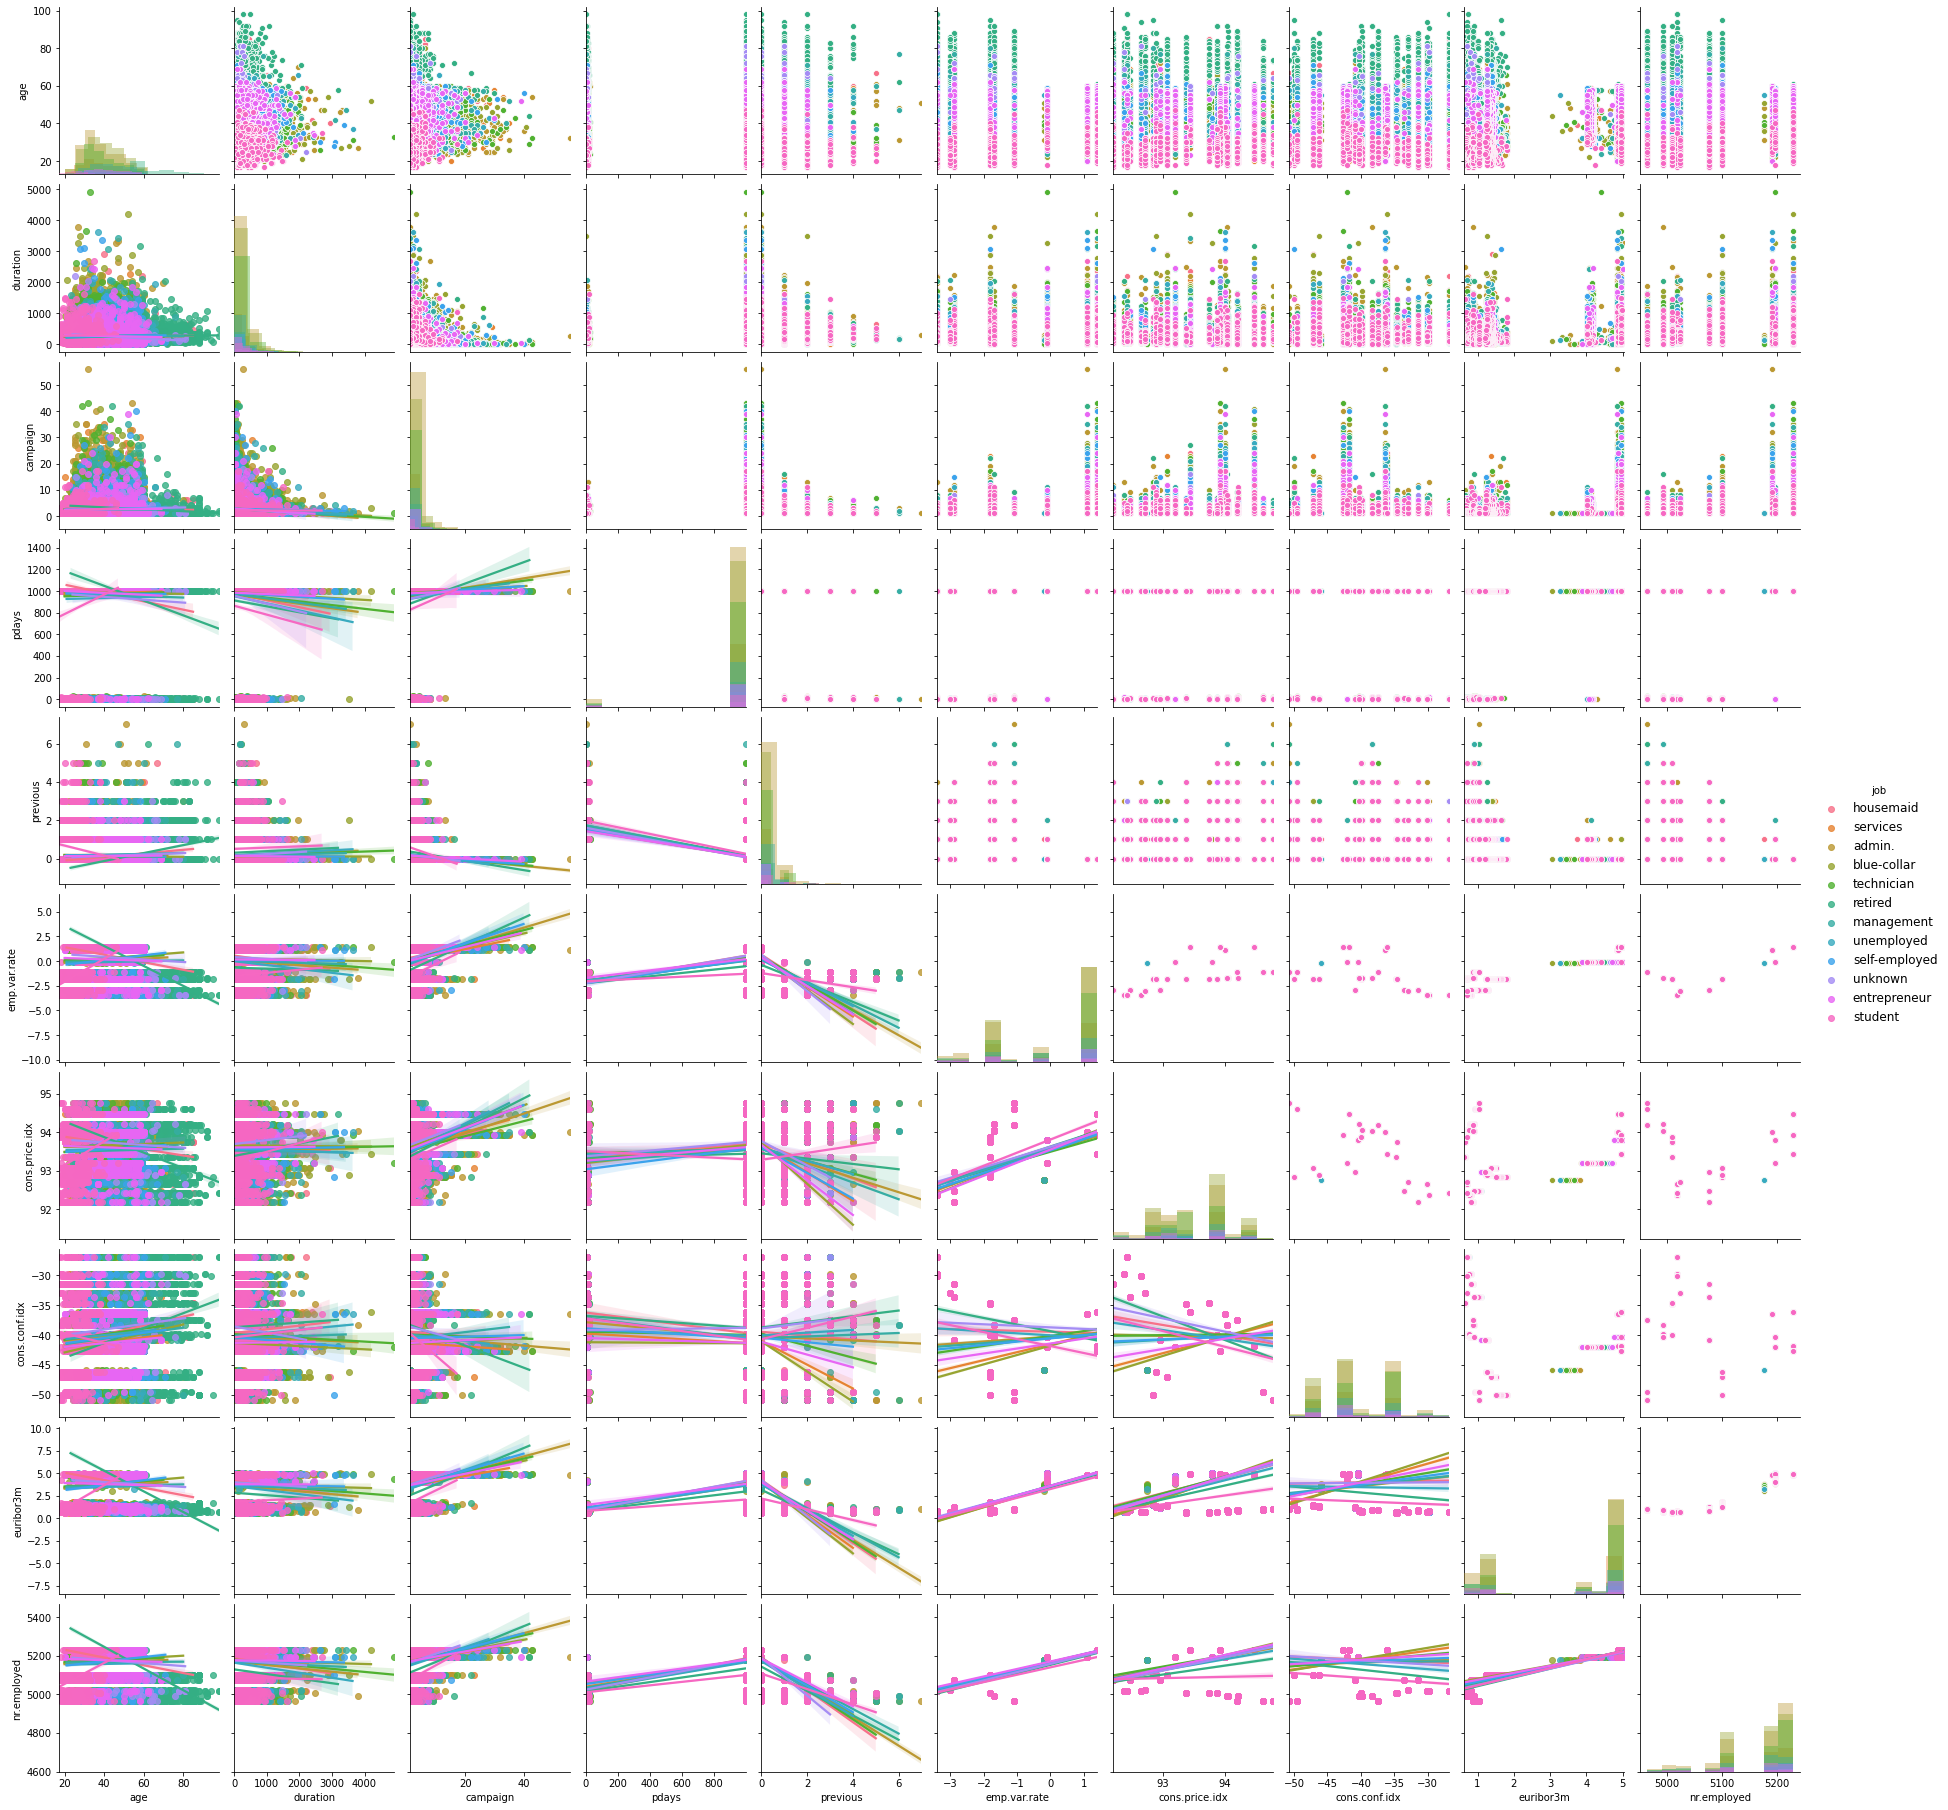

In [227]:
g = sns.PairGrid(data.loc[:, data.columns != "y"], hue="job")
g = g.map_diag(plt.hist, alpha=0.4)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.regplot)
g = g.add_legend(fontsize=12)

# Feauture engineering

As previously mentioned high cardinality was present in the covariates. In order to remedy this there are multiple 

In [440]:
# copy raw train_set into train_set variable for analysis
train_set = raw_dataset.copy()


## =========================================== re-map strings to variables ============================ ##

# rename variables for integer encoding
train_set['month'] = train_set['month'].map({'jan':1,'feb':2, 'mar':3, 'apr':4,  'may':5,
                                   'jun':6, 'jul':7,'aug':8 ,'sep':9 ,'oct':10,
                                   'nov':11,'dec':12, 'unknown':0, np.nan:0})

train_set['day_of_week'] = train_set['day_of_week'].map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5,'sat':6, 'sun':7, 'unknown':0, np.nan:0})


# rename variables for masking

train_set['y'] = train_set['y'].map({'yes':1 ,'no':0})

train_set['job'] = train_set['job'].map({ 'housemaid':1, 'services':2, 'admin.':3, 'blue-collar':4, 'technician':5,
                               'retired':6, 'management':7, 'unemployed':8, 
                               'self-employed':9, 'unknown':0, 'entrepreneur':10, 'student':11})

train_set['marital'] = train_set['marital'].map({'married':1, 'single':2, 'divorced':3, 'unknown':0, np.nan:0}) 
    
train_set['education'] = train_set['education'].map({'university.degree':1, 'basic.9y':2, 'high.school':3, 
                                             'professional.course':4, 'basic.6y':5, 'basic.4y':6,
                                             'unknown':7, 'illiterate':8, 'unknown':0, np.nan:0})

train_set['default'] = train_set['default'].map({'yes':1, 'no':2, 'unknown':0, np.nan:0 }) 
    
train_set['housing'] = train_set['housing'].map({'yes':1, 'no':2, 'unknown':0, np.nan:0 })

train_set['loan'] = train_set['loan'].map({'yes':1, 'no':2, 'unknown':0, np.nan:0 })

train_set['contact'] = train_set['contact'].map({'telephone':1 ,'cellular':2, 'unknown':0, np.nan:0})

train_set['poutcome'] = train_set['poutcome'].map({'nonexistent':1, 'failure':2, 'success':3, np.nan:0})

## =============================================================================================== ##

train_set.head(3)

age  job  marital  education  default  housing  loan  contact  month  \
0   56    1        1          6        2        2     2        1      5   
1   57    2        1          3        0        2     2        1      5   
2   37    2        1          3        2        1     2        1      5   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  

[3 rows x 21 columns]

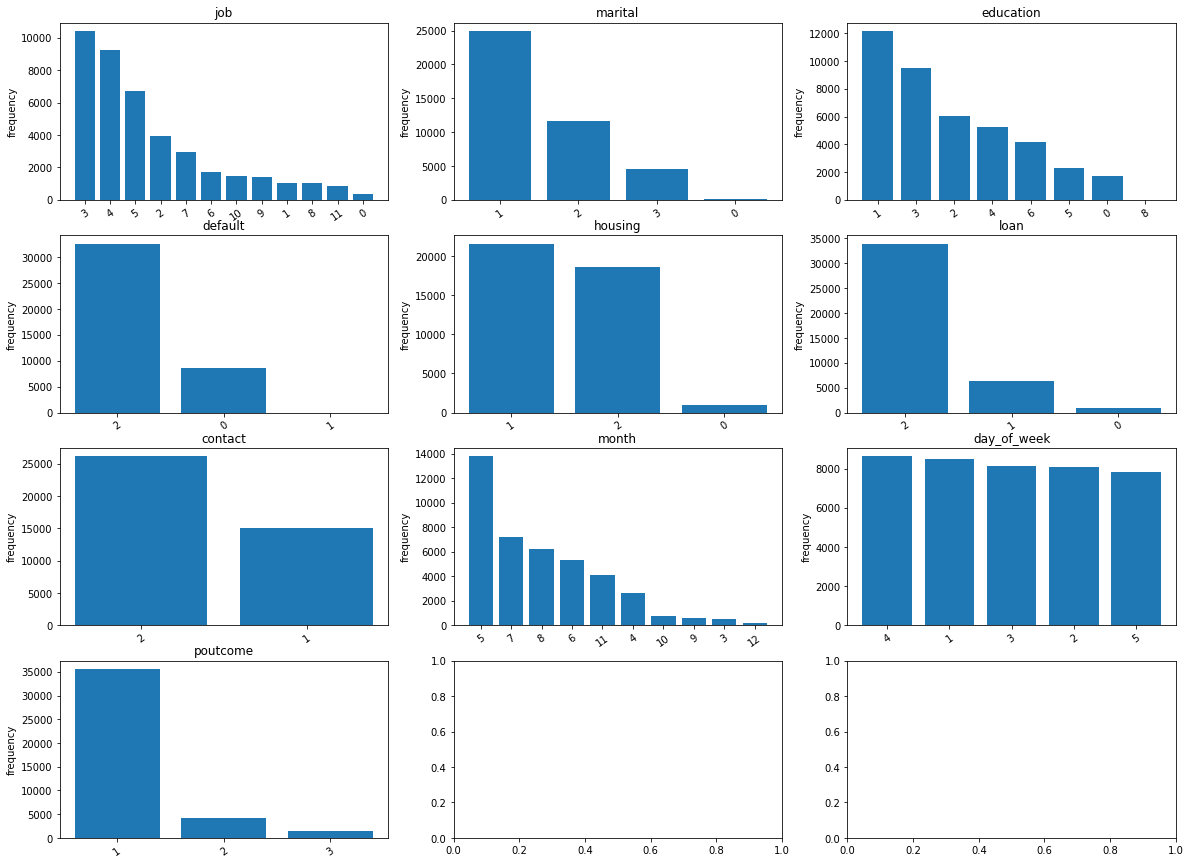

In [449]:
# categorical variables

fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = train_set[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    axs[trace_x, trace_y].set_ylabel("frequency")
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(35)
    
    counter += 1

plt.show()


In [450]:
# numeric variables


# Data preparation pipeline from data analysis and future engineering

In [436]:
# Final decision on encoding and transforming data

# Load data
# Import raw dataset from URL (same as data provided, just put in a git repository for ease of)
DATA_URL = 'https://raw.githubusercontent.com/ThamuMnyulwa/bankMarketing/main/bank-additional-full.csv' # DATA_URL

column_names = ["age","job","marital","education","default",
                "housing","loan","contact","month","day_of_week","duration",
                "campaign","pdays","previous","poutcome","emp.var.rate",
                "cons.price.idx","cons.conf.idx","euribor3m","nr.employed",
                "y"] # DF_COLUMNS



cat_columns = ["job","marital","education","default",
                "housing","loan","contact","month","day_of_week","poutcome"]


numeric_columns =  ["age","duration", "campaign","pdays","previous","emp.var.rate",
                "cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]

response = ["y"]

#raw_dataset = pd.read_csv(DATA_URL, sep=';', skipinitialspace=True, index_col=None)

# copy raw data
data = raw_dataset.copy()

In [437]:
# Final decision on encoding and transforming data

# Load data
# Import raw dataset from URL (same as data provided, just put in a git repository for ease of)
DATA_URL = 'https://raw.githubusercontent.com/ThamuMnyulwa/bankMarketing/main/bank-additional-full.csv' # DATA_URL

column_names = ["age","job","marital","education","default",
                "housing","loan","contact","month","day_of_week","duration",
                "campaign","pdays","previous","poutcome","emp.var.rate",
                "cons.price.idx","cons.conf.idx","euribor3m","nr.employed",
                "y"] # DF_COLUMNS
cat_columns = ["job","marital","education","default",
                "housing","loan","contact","month","day_of_week","poutcome"]
numeric_columns =  ["age","duration", "campaign","pdays","previous","emp.var.rate",
                "cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
response = ["y"]

raw_dataset = pd.read_csv(DATA_URL, sep=';', skipinitialspace=True, index_col=None)

# copy raw data
data = raw_dataset.copy()

# Copy raw data into data variable for analysis
data = raw_dataset.copy()

# variable types

ONE_HOT_VARS =  ["job","marital","education","default",
                "housing","loan","contact",
                "poutcome"]

INTEGER_ENCODE_VARS = ["month","day_of_week"]

STANDARDIZE_VARS =  ["campaign","emp.var.rate",
                "cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]

LOG_NORM_VARS = ["age","duration","campaign",
                 "pdays","nr.employed"]


## =========================================== Renaming all variables ============================ ##

# rename variables for integer encoding
data['month'] = data['month'].map({'jan':1,'feb':2, 'mar':3, 'apr':4,  'may':5,
                                   'jun':6, 'jul':7,'aug':8 ,'sep':9 ,'oct':10,
                                   'nov':11,'dec':12, 'unknown':0, np.nan:0})

data['day_of_week'] = data['day_of_week'].map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5,'sat':6, 'sun':7, 'unknown':0, np.nan:0})


# rename variables for masking

data['y'] = data['y'].map({'yes':1 ,'no':0})

data['job'] = data['job'].map({ 'housemaid':1, 'services':2, 'admin.':3, 'blue-collar':4, 'technician':5,
                               'retired':6, 'management':7, 'unemployed':8, 
                               'self-employed':9, 'unknown':0, 'entrepreneur':10, 'student':11})

data['marital'] = data['marital'].map({'married':1, 'single':2, 'divorced':3, 'unknown':0, np.nan:0}) 
    
data['education'] = data['education'].map({'university.degree':1, 'basic.9y':2, 'high.school':3, 
                                             'professional.course':4, 'basic.6y':5, 'basic.4y':6,
                                             'unknown':7, 'illiterate':8, 'unknown':0, np.nan:0})

data['default'] = data['default'].map({'yes':1, 'no':2, 'unknown':0, np.nan:0 }) 
    
data['housing'] = data['housing'].map({'yes':1, 'no':2, 'unknown':0, np.nan:0 })

data['loan'] = data['loan'].map({'yes':1, 'no':2, 'unknown':0, np.nan:0 })

data['contact'] = data['contact'].map({'telephone':1 ,'cellular':2, 'unknown':0, np.nan:0})

data['poutcome'] = data['poutcome'].map({'nonexistent':1, 'failure':2, 'success':3, np.nan:0})

## =============================================================================================== ##



age  job  marital  education  default  housing  loan  contact  month  \
0       56    1        1          6        2        2     2        1      5   
1       57    2        1          3        0        2     2        1      5   
2       37    2        1          3        2        1     2        1      5   
3       40    3        1          5        2        2     2        1      5   
4       56    2        1          3        2        2     1        1      5   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    6        1          4        2        1     2        2     11   
41184   46    4        1          4        2        2     2        2     11   
41185   56    6        1          1        2        1     2        2     11   
41186   44    5        1          4        2        2     2        2     11   
41187   74    6        1          4        2        1     2        2     11   

       day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0                1  ...         1    999         0         1           1.1   
1                1  ...         1    999         0         1           1.1   
2                1  ...         1    999         0         1           1.1   
3                1  ...         1    999         0         1           1.1   
4                1  ...         1    999         0         1           1.1   
...            ...  ...       ...    ...       ...       ...           ...   
41183            5  ...         1    999         0         1          -1.1   
41184            5  ...         1    999         0         1          -1.1   
41185            5  ...         2    999         0         1          -1.1   
41186            5  ...         1    999         0         1          -1.1   
41187            5  ...         3    999         1         2          -1.1   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0              93.994          -36.4      4.857       5191.0  0  
1              93.994          -36.4      4.857       5191.0  0  
2              93.994          -36.4      4.857       5191.0  0  
3              93.994          -36.4      4.857       5191.0  0  
4              93.994          -36.4      4.857       5191.0  0  
...               ...            ...        ...          ... ..  
41183          94.767          -50.8      1.028       4963.6  1  
41184          94.767          -50.8      1.028       4963.6  0  
41185          94.767          -50.8      1.028       4963.6  0  
41186          94.767          -50.8      1.028       4963.6  1  
41187          94.767          -50.8      1.028       4963.6  0  

[41188 rows x 21 columns]

In [617]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
# Final decision on encoding and transforming data

# Load data
# Import raw dataset from URL (same as data provided, just put in a git repository for ease of)

DATA_URL = 'https://raw.githubusercontent.com/ThamuMnyulwa/bankMarketing/main/bank-additional-full.csv'  # DATA_URL

column_names = [  # DF_COLUMNS
    'age',
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
    'y',
    ]
cat_columns = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'poutcome',
    ]
numeric_columns = [
    'age',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
    ]
response = ['y']

raw_dataset = pd.read_csv(DATA_URL, sep=';', skipinitialspace=True,
                          index_col=None)

# copy raw data

data = raw_dataset.copy()

# Copy raw data into data variable for analysis

data = raw_dataset.copy()

# variable types

ONE_HOT_VARS = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'poutcome',
    ]

INTEGER_ENCODE_VARS = ['month', 'day_of_week']

STANDARDIZE_VARS = [
    'campaign',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
    ]

LOG_NORM_VARS = ['age', 'duration', 'campaign', 'pdays', 'nr.employed']

## =========================================== Renaming all variables ============================ ##

# rename variables for integer encoding

data['month'] = data['month'].map({
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12,
    'unknown': 0,
    np.nan: 0,
    })

data['day_of_week'] = data['day_of_week'].map({
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5,
    'sat': 6,
    'sun': 7,
    'unknown': 0,
    np.nan: 0,
    })

# rename variables for masking

data['y'] = data['y'].map({'yes': 1, 'no': 0})

data['job'] = data['job'].map({
    'housemaid': 1,
    'services': 2,
    'admin.': 3,
    'blue-collar': 4,
    'technician': 5,
    'retired': 6,
    'management': 7,
    'unemployed': 8,
    'self-employed': 9,
    'unknown': 0,
    'entrepreneur': 10,
    'student': 11,
    })

data['marital'] = data['marital'].map({
    'married': 1,
    'single': 2,
    'divorced': 3,
    'unknown': 0,
    np.nan: 0,
    })

data['education'] = data['education'].map({
    'university.degree': 1,
    'basic.9y': 2,
    'high.school': 3,
    'professional.course': 4,
    'basic.6y': 5,
    'basic.4y': 6,
    'unknown': 7,
    'illiterate': 8,
    'unknown': 0,
    np.nan: 0,
    })

data['default'] = data['default'].map({
    'yes': 1,
    'no': 2,
    'unknown': 0,
    np.nan: 0,
    })

data['housing'] = data['housing'].map({
    'yes': 1,
    'no': 2,
    'unknown': 0,
    np.nan: 0,
    })

data['loan'] = data['loan'].map({
    'yes': 1,
    'no': 2,
    'unknown': 0,
    np.nan: 0,
    })

data['contact'] = data['contact'].map({
    'telephone': 1,
    'cellular': 2,
    'unknown': 0,
    np.nan: 0,
    })

data['poutcome'] = data['poutcome'].map({
    'nonexistent': 1,
    'failure': 2,
    'success': 3,
    np.nan: 0,
    })

## =============================================================================================== ##

# Outer loop 0 to 9, since train.colums has 9 col

for i in range(len(data.columns)):    
    if data.columns[i] in str(cat_columns):
        data[data.columns[i]] = data[data.columns[i]].astype('object')
    
    if train.columns[i] in str(int64_cols):
        train[train.columns[i]] = train[train.columns[i]].astype('float32')
        
# ================================= Split the data - train, validation and test ===============================#

(train_set, test_set) = train_test_split(data, test_size=0.30,
        random_state=RANDOM_SEED)  # RANDOM_SEED = 100

X_train = train_set.drop('y', axis=1)
X_test = test_set.drop('y', axis=1)

y_train = train_set['y']
y_test = test_set['y']

logger.info(f"Training shape: {train_set.shape}")
logger.info(f"Test shape: {test_set.shape}")

# ======================================  Integer incode (ordianal categorical variable) =================================#

from sklearn.preprocessing import OrdinalEncoder

INTEGER_ENCODE_VARS = ['month', 'day_of_week']

# Instead of using an encoder, we can just do this with a simple for loop

for i in range(len(X_test.columns)):
    if X_test.columns[i] in str(INTEGER_ENCODE_VARS):
        X_test[X_test.columns[i]] = \
            X_test[X_test.columns[i]].astype('int64')
for i in range(len(X_train.columns)):
    if X_train.columns[i] in str(INTEGER_ENCODE_VARS):
        X_train[X_train.columns[i]] = \
            X_train[X_train.columns[i]].astype('int64')
            
logger.info(f'Integerencode')
#logger.info(pd.DataFrame(X_test[INTEGER_ENCODE_VARS]).head(2))

# ======================================  One-hot incode (categorical unordered) =================================#

from sklearn.preprocessing import StandardScaler

NUMERIC_COLUMNS = [
    'age',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
    ]

# create scaler

scaler = StandardScaler()

#  fit  the scaler to the train set

scaler.fit(X_train[NUMERIC_COLUMNS])

X_train = pd.DataFrame(scaler.transform(X_train[NUMERIC_COLUMNS]),
                       columns=NUMERIC_COLUMNS)

X_test = pd.DataFrame(scaler.transform(X_test[NUMERIC_COLUMNS]),
                      columns=NUMERIC_COLUMNS)
                      
logger.info(f'Standard scaler')

# ======================================  One-hot incode (categorical unordered) ================== #

# Chose not to one hot-encode at this point. reason being that there would be too many columns,
# would rather drop some columns in variable selection notebook and then come back to do this.


2021-11-21 20:33:56.862 | INFO     | __main__:<module>:226 - Training shape: (28831, 21)
2021-11-21 20:33:56.863 | INFO     | __main__:<module>:227 - Test shape: (12357, 21)
2021-11-21 20:33:56.870 | INFO     | __main__:<module>:246 - Integerencode
2021-11-21 20:33:56.888 | INFO     | __main__:<module>:280 - Standard scaler


In [618]:
X_train

age  duration  campaign     pdays  previous  emp.var.rate  \
0     -0.863168 -0.599620  0.511186  0.196609 -0.350400      0.649769   
1      1.052665 -0.157795  0.152623  0.196609 -0.350400     -0.114601   
2     -0.096835  0.280220  0.152623  0.196609 -0.350400      0.840862   
3      2.681123 -0.492973  0.511186  0.196609  3.679266     -0.751576   
4     -0.288418  0.028837  0.152623  0.196609 -0.350400      0.840862   
...         ...       ...       ...       ...       ...           ...   
28826  0.382123 -0.230163 -0.205939  0.196609 -0.350400      0.840862   
28827  0.190540 -0.195884 -0.564502  0.196609 -0.350400      0.649769   
28828 -0.096835 -0.214928 -0.564502  0.196609 -0.350400      0.840862   
28829 -1.725293  1.933254  3.379688  0.196609 -0.350400      0.840862   
28830  2.872706 -0.713885  0.152623  0.196609 -0.350400     -2.216618   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0            0.723310       0.891842   0.715460     0.333624  
1           -0.650839      -0.319726   0.231941     0.400058  
2            0.591780      -0.471172   0.773091     0.847102  
3            1.773824      -1.942361  -1.509077    -2.813682  
4            1.538454      -0.276456   0.717766     0.847102  
...               ...            ...        ...          ...  
28826        0.591780      -0.471172   0.773667     0.847102  
28827        0.723310       0.891842   0.713731     0.333624  
28828        1.538454      -0.276456   0.765599     0.847102  
28829        0.591780      -0.471172   0.774243     0.847102  
28830       -1.981721       2.947180  -1.661797    -2.067685  

[28831 rows x 10 columns]

2021-11-21 20:22:04.557 | INFO     | __main__:<module>:15 - Integerencode
2021-11-21 20:22:04.559 | INFO     | __main__:<module>:16 -        month  day_of_week
33148      5            2
27585     11            5


In [604]:
# DELETE variable types

ONE_HOT_VARS =  ["job","marital","education","default",
                "housing","loan","contact",
                "poutcome"]

INTEGER_ENCODE_VARS = ["month","day_of_week"]

STANDARDIZE_VARS =  ["campaign","duration","pdays","emp.var.rate", "duration",
                "cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]

LOG_NORM_VARS = ["age","campaign","nr.employed"]






In [592]:
# check that test set does not contain null values in the engineered variables

LOG_NORM_VARS = ["age","campaign","nr.employed"]

for var in LOG_NORM_VARS:
    X_train[var] = np.log(X_train[var])
    X_test[var] = np.log(X_test[var])

# check that test set does not contain null values in the engineered variables
[var for var in LOG_NORM_VARS if X_test[var].isnull().sum() > 0]




/home/thamu/.local/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[]

In [ ]:
from feature_engine.encoding import OneHotEncoder

age  duration  campaign     pdays  previous  emp.var.rate  \
0     -0.863168 -0.599620  0.511186  0.196609 -0.350400      0.649769   
1      1.052665 -0.157795  0.152623  0.196609 -0.350400     -0.114601   
2     -0.096835  0.280220  0.152623  0.196609 -0.350400      0.840862   
3      2.681123 -0.492973  0.511186  0.196609  3.679266     -0.751576   
4     -0.288418  0.028837  0.152623  0.196609 -0.350400      0.840862   
...         ...       ...       ...       ...       ...           ...   
28826  0.382123 -0.230163 -0.205939  0.196609 -0.350400      0.840862   
28827  0.190540 -0.195884 -0.564502  0.196609 -0.350400      0.649769   
28828 -0.096835 -0.214928 -0.564502  0.196609 -0.350400      0.840862   
28829 -1.725293  1.933254  3.379688  0.196609 -0.350400      0.840862   
28830  2.872706 -0.713885  0.152623  0.196609 -0.350400     -2.216618   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0            0.723310       0.891842   0.715460     0.333624  
1           -0.650839      -0.319726   0.231941     0.400058  
2            0.591780      -0.471172   0.773091     0.847102  
3            1.773824      -1.942361  -1.509077    -2.813682  
4            1.538454      -0.276456   0.717766     0.847102  
...               ...            ...        ...          ...  
28826        0.591780      -0.471172   0.773667     0.847102  
28827        0.723310       0.891842   0.713731     0.333624  
28828        1.538454      -0.276456   0.765599     0.847102  
28829        0.591780      -0.471172   0.774243     0.847102  
28830       -1.981721       2.947180  -1.661797    -2.067685  

[28831 rows x 10 columns]

In [526]:
### One-hot encode (ordianal encode)
LOG_NORM_VARS = ['age', 'campaign','nr.employed']

In [527]:
# Logarthm transformation




for var in LOG_NORM_VARS:
    X_train[var] = np.log(X_train[var])
    X_test[var] = np.log(X_test[var])
    

In [ ]:
## Final preprocessing designed from data analysis

from config import (NUMERICAL_VARS_WITH_NA, 
                    DROP_VARS,
                    ONE_HOT_VARS)

# from Scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# from feature-engine
from feature_engine.imputation import (
    AddMissingIndicator,
    MeanMedianImputer
)

from feature_engine.encoding import (
    OneHotEncoder
)

from feature_engine.selection import DropFeatures

# set up the pipeline
model_pipeline = Pipeline([

     # ===== IMPUTATION =====
      # add missing indicator
    ('missing_indicator', AddMissingIndicator(variables=NUMERICAL_VARS_WITH_NA)),

    # impute numerical variables with the mean
    ('mean_imputation', MeanMedianImputer(
        imputation_method='mean', variables=NUMERICAL_VARS_WITH_NA
    )),

    ('drop_features', DropFeatures(features_to_drop=DROP_VARS)),

    # ==== VARIABLE TRANSFORMATION =====
    
    ('one_hot_encode', OneHotEncoder(top_categories=None, variables=ONE_HOT_VARS, drop_last=True)),
   
     ('scaler', StandardScaler()),
     ("model", RandomForestRegressor())

])

In [298]:
# Test-train split

import pandas as pd
from loguru import logger
from sklearn.model_selection import train_test_split
#from config import DATA_URL, DF_COLUMNS, RANDOM_SEED
import pandas as pd
from loguru import logger
#from pipeline import model_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


raw_dataset = pd.read_csv(DATA_URL, names=DF_COLUMNS,
                          na_values='?',sep='\s+'
                          , skipinitialspace=True)

RANDOM_SEED = 100



# Copy raw data into data variable for analysis
#data = raw_dataset.copy()
#data = data.replace({"Origin": {1: 'US', 2: 'Asia', 3: 'EU'}})


# Split the data - train, validation and test
train, test = train_test_split(data,test_size=0.30, random_state=RANDOM_SEED) # RANDOM_SEED = 100


# Copy raw data into data variable for analysis
data = raw_dataset.copy()
data = data.replace({"Origin": {1: 'US', 2: 'Asia', 3: 'EU'}})

def train_predict(dataset = data) -> None:
    """Train the model."""

    # Split the data - train, validation and test
    train_set, test_set = train_test_split(dataset,
                                        test_size=0.30,
                                        random_state=RANDOM_SEED)

NameError: name 'DATA_URL' is not defined